<a href="https://colab.research.google.com/github/yimuzy/20s_ma573/blob/master/PRO/5_8_11_11.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **1.a) loss distribution based on multivariate normal distribution**

In [784]:
!pip install yahoo-finance
!pip install pandas_market_calendars

import pandas as pd
import pandas_market_calendars as pmc
import pandas_datareader.data as drd
import numpy as np
import seaborn as sns
from pandas_datareader import data as pdr

In [0]:
AAPL= drd.get_data_yahoo('AAPL','01/01/2012','04/17/2020',interval='d')
TSLA= drd.get_data_yahoo('TSLA','01/01/2012','04/17/2020',interval='d')
GILD= drd.get_data_yahoo('GILD','01/01/2012','04/17/2020',interval='d')
MELI= drd.get_data_yahoo('MELI','01/01/2012','04/17/2020',interval='d')
MSFT= drd.get_data_yahoo('MSFT','01/01/2012','04/17/2020',interval='d')
DIS= drd.get_data_yahoo('DIS','01/01/2012','04/17/2020',interval='d')
NVDA= drd.get_data_yahoo('NVDA','01/01/2012','04/17/2020',interval='d')
TCO= drd.get_data_yahoo('TCO','01/01/2012','04/17/2020',interval='d')
MMM= drd.get_data_yahoo('MMM','01/01/2012','04/17/2020',interval='d')
INCY= drd.get_data_yahoo('INCY','01/01/2012','04/17/2020',interval='d')
IBM= drd.get_data_yahoo('IBM','01/01/2012','04/17/2020',interval='d')
EPC= drd.get_data_yahoo('EPC','01/01/2012','04/17/2020',interval='d')
SPY= drd.get_data_yahoo('SPY','01/01/2012','04/17/2020',interval='d')
YELP= drd.get_data_yahoo('VEA','01/01/2012','04/17/2020',interval='d')
VTI= drd.get_data_yahoo('VTI','01/01/2012','04/17/2020',interval='d')
yelp_1= drd.get_data_yahoo('YELP','01/01/2012','04/17/2020',interval='d')
SPY= drd.get_data_yahoo('SPY','01/01/2012','04/17/2020',interval='d')

In [786]:
SPY

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2012-01-03,128.380005,127.430000,127.760002,127.500000,193697900.0,108.037117
2012-01-04,127.809998,126.709999,127.199997,127.699997,127186500.0,108.206604
2012-01-05,128.229996,126.430000,127.010002,128.039993,173895000.0,108.494698
2012-01-06,128.220001,127.290001,128.199997,127.709999,148050000.0,108.215065
2012-01-09,128.179993,127.410004,128.000000,128.020004,99530200.0,108.477776
...,...,...,...,...,...,...
2020-04-13,277.510010,271.410004,277.140015,275.660004,114839100.0,275.660004
2020-04-14,284.899994,275.510010,280.980011,283.790009,134143400.0,283.790009
2020-04-15,283.940002,275.459991,277.570007,277.760010,121775000.0,277.760010


In [0]:
import pandas_market_calendars as mcal
nyse = mcal.get_calendar('NYSE')
tradingdays = nyse.schedule(start_date='2012-01-01', end_date='2020-04-17')
tradingdays1=tradingdays.index

In [0]:
nan_date=tradingdays.index[:41]

ADD= pd.DataFrame(columns=['High','Low','Open','Close','Volume','Adj Close'],index=nan_date)
tickers=['SPY','YELP']
port = pdr.get_data_yahoo(tickers, start="2012-01-01", end="2020-04-17")['Adj Close']
log_port=np.log(port)

In [789]:
for i in range(41):
  time_win=log_port.iloc[41-i:1047-i]['YELP']
  log_return=[]
  for j in range(1005):
    log_return.append(time_win[j+1]-time_win[j])
  u=np.mean(log_return)
  var=np.var(log_return)
  a=np.random.normal(u,var,1)
  log_port.iloc[40-i]['YELP']=log_port.iloc[41-i]['YELP']-a
yelp_update=np.exp(log_port)

for i in range(41):
  ADD.iloc[i]['Adj Close']=yelp_update.iloc[i]['YELP']

for i in range(2045):
  YELP.iloc[i+41]['Adj Close']=yelp_1.iloc[i]['Adj Close'].item()
for i in range(41):
  YELP.iloc[i]['Adj Close']=ADD.iloc[i]['Adj Close'].item()

YELP

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2012-01-03,31.570000,31.250000,31.260000,31.450001,8276700.0,24.822149
2012-01-04,31.350000,31.070000,31.290001,31.270000,2609200.0,24.794242
2012-01-05,30.850000,30.590000,30.770000,30.820000,2095900.0,24.813565
2012-01-06,30.730000,30.330000,30.730000,30.459999,2044000.0,24.812384
2012-01-09,30.620001,30.320000,30.610001,30.530001,1652200.0,24.810751
...,...,...,...,...,...,...
2020-04-13,34.740002,34.200001,34.669998,34.500000,34969000.0,19.139999
2020-04-14,35.369999,34.970001,35.029999,35.119999,21511100.0,19.510000
2020-04-15,34.240002,33.869999,34.060001,33.980000,22435900.0,18.590000


In [790]:
stock_list=[AAPL,TSLA,GILD,MELI,MSFT,DIS,NVDA,TCO,MMM,INCY,IBM,EPC,SPY,YELP,VTI]
index_list=['AAPL','TSLA','GILD','MELI','MSFT','DIS','NVDA','TCO','MMM','INCY','IBM','EPC','SPY','YELP','VTI']
log_price=[]
for i in range(15):
  stock_log=np.log(stock_list[i]['Adj Close'])
  log_price.append(stock_log)
log_price[0]

Date
2012-01-03    3.929022
2012-01-04    3.934382
2012-01-05    3.945423
2012-01-06    3.955823
2012-01-09    3.954235
                ...   
2020-04-13    5.607684
2020-04-14    5.656953
2020-04-15    5.647784
2020-04-16    5.655698
2020-04-17    5.642037
Name: Adj Close, Length: 2086, dtype: float64

In [791]:
var_list=[]
for i in range(15):
  a=log_price[i].var()
  var_list.append(a)
sort_list=var_list.copy()
sort_list.sort()
choose_list=sort_list[-4:]
name_list=[]
for i in range(4):
  a=choose_list[i]
  b=var_list.index(a)
  name_list.append(index_list[b])
name_list

['INCY', 'MELI', 'TSLA', 'NVDA']

In [792]:
weektime=[]
for i in tradingdays1:
  if i.weekday() == 2:
    weektime.append(i)

nan_list=[]
nan_index=[]
for i in range(422):
  if weektime[i+1]-weektime[i] != pd.Timedelta('7 days'):
    nan_list.append(weektime[i])
    nan_index.append(i)


#weektime: wednesday date list
#weektime[-1]
print(nan_index)
print(nan_list)
#找到缺失tradingday的周三 以周二数据代替

[25, 101, 335, 356, 410]
[Timestamp('2012-06-27 00:00:00', freq='C'), Timestamp('2013-12-18 00:00:00', freq='C'), Timestamp('2018-06-27 00:00:00', freq='C'), Timestamp('2018-11-28 00:00:00', freq='C'), Timestamp('2019-12-18 00:00:00', freq='C')]


In [793]:
p1=pd.Timestamp(2012,7,3)
p2=pd.Timestamp(2013,12,24)
p3=pd.Timestamp(2013,12,31)
p4=pd.Timestamp(2018,7,3)
p5=pd.Timestamp(2018,12,4)
p6=pd.Timestamp(2019,12,24)
p7=pd.Timestamp(2019,12,31)
weektime.insert(26,p1)
weektime.insert(103,p2)
weektime.insert(104,p3)
weektime.insert(339,p4)
weektime.insert(361,p5)
weektime.insert(416,p6)
weektime.insert(417,p7)
len(weektime)

433

In [0]:
from datetime import date
total_num=len(tradingdays)
date_list=[]
for i in range(total_num-1):
  if tradingdays.index[i].day > tradingdays.index[i+1].day:
    date_list.append(tradingdays.index[i])

#date_list 每个月最后一个交易日列表
#date_list

In [0]:
index_list=['AAPL','TSLA','GILD','MELI','MSFT','DIS','NVDA','TCO','MMM','INCY','IBM','EPC','SPY','YELP','VTI']

def new_portfolio():
    res = pd.DataFrame(columns=['Share', 'Adj Close'],index=pd.Series(index_list))
    return res

my_port = new_portfolio()
#my_port portfolio模型

In [0]:
update_list=[] #所有天的portfolio

for i in range(len(index_list)):
    a=index_list[i]
    my_port.loc[a]['Adj Close']=stock_list[i].loc['2012-01-03']['Adj Close']
update_list.append(my_port)

for j in range(len(date_list)):
  b=date_list[j]
  my_port=new_portfolio()
  for i in range(len(index_list)):
    a=index_list[i]
    my_port.loc[a]['Adj Close']=stock_list[i].loc[b]['Adj Close']
  update_list.append(my_port)

#更新所有portfolio adjclose这一列


In [0]:
for i in range(len(index_list)):
    a=index_list[i]
    update_list[0].loc[a]['Share']=(400000/15)/update_list[0].loc[a]['Adj Close']

def total_value(portfolio1,portfolio2):
  res=0
  for i in range(len(index_list)):
    a=index_list[i]
    res+=portfolio1.loc[a]['Share']*portfolio2.loc[a]['Adj Close']
  return res

for i in range(len(update_list)-1):
  to_value=total_value(update_list[i],update_list[i+1])
  for j in range(len(index_list)):
    a=index_list[j]
    update_list[i+1].loc[a]['Share']=(to_value/15)/update_list[i+1].loc[a]['Adj Close']

#更新所有portfolio share这一列
#update——list 包含所有的portfolio zaiyuemojiaoyiri

#截止到此，我们获取了每月最后一日的portfolio的信息

In [798]:
week_stock=[] #所有Wednesday的portfolio

for j in range(len(weektime)):
  b=weektime[j]
  my_port=new_portfolio()
  for i in range(len(index_list)):
    a=index_list[i]
    my_port.loc[a]['Adj Close']=stock_list[i].loc[b]['Adj Close']
  week_stock.append(my_port)
len(week_stock)

433

In [0]:
m=0
for i in range(len(week_stock)):
  if weektime[i].month <= date_list[m].month:
    for j in range(len(index_list)):
      a=index_list[j]
      week_stock[i].loc[a]['Share']=update_list[m+1].loc[a]['Share']
  else:
    m+=1
    for j in range(len(index_list)):
      a=index_list[j]
      week_stock[i].loc[a]['Share']=update_list[m+1].loc[a]['Share']

#week_stock all updated

In [800]:
len(week_stock)
len(weektime)

433

In [801]:
weektime[208]

Timestamp('2015-12-30 00:00:00', freq='C')

In [802]:
a=weektime[0]
AAPL.loc[a]['Adj Close']
a

Timestamp('2012-01-04 00:00:00', freq='C')

In [0]:
stock_list=[AAPL,TSLA,GILD,MELI,MSFT,DIS,NVDA,TCO,MMM,INCY,IBM,EPC,SPY,YELP,VTI]
log_return=[]
for j in range(15):
  price_list=[]
  for i in range(len(weektime)):
    b=weektime[i]
    a=stock_list[j].loc[b]['Adj Close']
    price_list.append(a)
  stock_log=np.log(price_list)
  len_num=len(stock_log)
  for j in range(len_num-1):
    stock_log[j]=stock_log[j+1]-stock_log[j]
  log_return.append(stock_log[:-1])
#log_return for 15 equities

现在以四年的时间长度rolling来estimate multivariate normal的参数 再compute新log return 再算新loss 也就是我们算的是2016年第一个周三到2020年三月份最后一个周三 computed losses.

In [804]:
u_list=[]
for j in range(225):
  u=[]
  for i in range(15):
    a=log_return[i][j:(j+209)]
    u.append(a.mean())
  u_list.append(u)
len(u_list)

225

In [805]:
cov_list=[]
for j in range(225):
  df_temp={}
  for i in range(15):
    df_temp[index_list[i]]=log_return[i][j:(j+209)]
  df = pd.DataFrame(df_temp)
  cov_mat=df.cov()  
  cov_list.append(cov_mat)

cov_list[0]

,AAPL,TSLA,GILD,MELI,MSFT,DIS,NVDA,TCO,MMM,INCY,IBM,EPC,SPY,YELP,VTI
AAPL,0.001226,0.000265,0.000256,0.000636,0.000319,0.000299,0.000263,0.000147,0.000254,0.000332,0.000225,0.000296,0.000299,0.000470,0.000304
TSLA,0.000265,0.004452,0.000740,0.001214,0.000600,0.000514,0.000554,0.000080,0.000314,0.000956,0.000243,0.000156,0.000391,0.001640,0.000421
GILD,0.000256,0.000740,0.001728,0.000786,0.000225,0.000371,0.000184,0.000240,0.000298,0.000901,0.000107,0.000233,0.000307,0.000830,0.000320
MELI,0.000636,0.001214,0.000786,0.003159,0.000484,0.000535,0.000687,0.000191,0.000454,0.000581,0.000383,0.000430,0.000493,0.001974,0.000521
MSFT,0.000319,0.000600,0.000225,0.000484,0.001018,0.000331,0.000470,0.000165,0.000265,0.000231,0.000280,0.000178,0.000328,0.000462,0.000325
DIS,0.000299,0.000514,0.000371,0.000535,0.000331,0.000622,0.000377,0.000185,0.000294,0.000279,0.000199,0.000215,0.000296,0.000710,0.000301
NVDA,0.000263,0.000554,0.000184,0.000687,0.000470,0.000377,0.001276,0.000191,0.000297,0.000265,0.000239,0.000137,0.000302,0.000647,0.000311
TCO,0.000147,0.000080,0.000240,0.000191,0.000165,0.000185,0.000191,0.000605,0.000139,0.000175,0.000119,0.000134,0.000167,0.000301,0.000174
MMM,0.000254,0.000314,0.000298,0.000454,0.000265,0.000294,0.000297,0.000139,0.000436,0.000342,0.000168,0.000237,0.000263,0.000405,0.000267
INCY,0.000332,0.000956,0.000901,0.000581,0.000231,0.000279,0.000265,0.000175,0.000342,0.004734,-0.000012,0.000314,0.000307,0.000795,0.000340


In [0]:
linloss_list=[]
for n in range(225):
  linloss=0
  var = np.random.multivariate_normal(mean=u_list[n], cov=cov_list[n]) 
  for j in range(len(index_list)):
    a=index_list[j]
    linloss+=week_stock[208+n].loc[a]['Share']*week_stock[208+n].loc[a]['Adj Close']*var[j]
  linloss_list.append(-linloss)
len(linloss_list)
#229:2016diyigezhousan--2020.4.22
linloss_equity=linloss_list[-14:]

In [0]:
import seaborn as sns 
import matplotlib.pyplot as plt
def pdf_function1(loss,title):
  sns.distplot(loss,color="black",bins=50,kde=True)
  plt.title(title)
  plt.show()

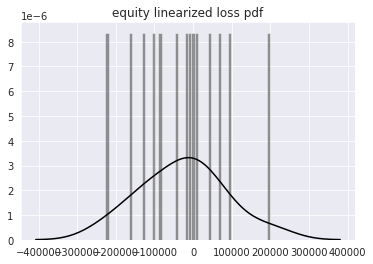

In [808]:
pdf_function1(linloss_equity,'equity linearized loss pdf')

In [0]:
bond1=[2.258,2.310,2.324,2.383,2.233,2.209,2.242,2.245,2.365,2.376,2.396,2.368,2.273,2.264,2.108,2.175,2.126,2.044,1.858,1.712,1.423,1.870,1.375,1.257,1.330,1.260]
bond3=[2.271,2.322,2.321,2.380,2.233,2.207,2.238,2.246,2.355,2.372,2.388,2.352,2.258,2.241,2.088,2.162,2.119,2.033,1.851,1.690,1.387,1.853,1.412,1.283,1.359,1.296]

In [0]:
bond30=[c*0.01 for c in bond3]
bond10=[c*0.01 for c in bond1]

In [811]:
len(bond10)

26

In [0]:
a30=15+9+30+31+31+29+31+30+31+30+31
c=a30/365+27
#2019.10.23 PERIOD

In [0]:
period_list1=[c,]
period_list2=[c,]
for i in range(25):
  a30=a30-7
  b1=a30/365+27
  b2=a30/365+24
  period_list1.append(b1)
  period_list2.append(b2)

period30=period_list1[12:]
period10=period_list2[12:]

In [0]:
yield_change10=[]
yield_change30=[]
for i in range(25):
  a=bond30[i+1]-bond30[i]
  b=bond10[i+1]-bond10[i]
  yield_change10.append(b)
  yield_change30.append(a)
#yield_change30
#yield_change10
yieldchange=[np.array(yield_change10),np.array(yield_change30)]

In [0]:
u_list=[]
for j in range(14):
  u=[]
  for i in range(2):
    a=yieldchange[i][j:(j+12)]
    u.append(a.mean())
  u_list.append(u)

In [816]:
cov_list=[]
bond_index=['bond10','bond30']
for j in range(14):
  df_temp={}
  for i in range(2):
    df_temp[bond_index[i]]=yieldchange[i][j:(j+12)]
  df = pd.DataFrame(df_temp)
  cov_mat=df.cov()  
  cov_list.append(cov_mat)

cov_list[0]

,bond10,bond30
bond10,5.024205e-07,4.852841e-07
bond30,4.852841e-07,4.721538e-07


In [0]:
bond_price10=[0.57239,0.572375,0.598495,0.584175,0.592505,0.604465,0.63292,0.64429,0.68259,0.62449,0.694705,0.73483,0.71203,0.732635]
bond_price30=[0.536425,0.537195,0.564690,0.548540,0.556420,0.569590,0.598885,0.613025,0.654810,0.586930,0.657060,0.702030,0.676945,0.698375]

In [818]:
share1=300000/0.56817  #2019.10.23 bond10 price=0.56817/share; 300000 capital
share2=300000/0.527875  #2019.10.23 bond30 price=0.527875/share; 300000 capital
linloss_bond=[]
for i in range(14):
  var = np.random.multivariate_normal(mean=u_list[i], cov=cov_list[i])
  a=share1*bond_price10[i]*(bond10[12+i]-(period10[i]*var[0]))+share2*bond_price30[i]*(bond30[12+i]-(period30[i]*var[1]))
  linloss_bond.append(-a)

linloss_bond

[-14955.959145915374,
 -17979.828648044237,
 55.50142781325354,
 -32016.713318095342,
 -4526.679913739174,
 -19877.867237558377,
 -25676.065230812805,
 -5312.319800671587,
 -21245.221958057307,
 -20949.75633394406,
 9098.761991424406,
 -28212.15987993186,
 -75316.51911089133,
 40404.2773274527]

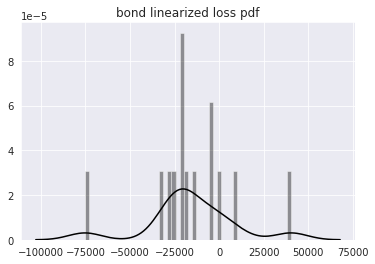

In [819]:
pdf_function1(linloss_bond,'bond linearized loss pdf')

In [820]:
magic_period=weektime[-26:]
magic_period

[Timestamp('2019-10-23 00:00:00', freq='C'),
 Timestamp('2019-10-30 00:00:00', freq='C'),
 Timestamp('2019-11-06 00:00:00', freq='C'),
 Timestamp('2019-11-13 00:00:00', freq='C'),
 Timestamp('2019-11-20 00:00:00', freq='C'),
 Timestamp('2019-11-27 00:00:00', freq='C'),
 Timestamp('2019-12-04 00:00:00', freq='C'),
 Timestamp('2019-12-11 00:00:00', freq='C'),
 Timestamp('2019-12-18 00:00:00', freq='C'),
 Timestamp('2019-12-24 00:00:00'),
 Timestamp('2019-12-31 00:00:00'),
 Timestamp('2020-01-08 00:00:00', freq='C'),
 Timestamp('2020-01-15 00:00:00', freq='C'),
 Timestamp('2020-01-22 00:00:00', freq='C'),
 Timestamp('2020-01-29 00:00:00', freq='C'),
 Timestamp('2020-02-05 00:00:00', freq='C'),
 Timestamp('2020-02-12 00:00:00', freq='C'),
 Timestamp('2020-02-19 00:00:00', freq='C'),
 Timestamp('2020-02-26 00:00:00', freq='C'),
 Timestamp('2020-03-04 00:00:00', freq='C'),
 Timestamp('2020-03-11 00:00:00', freq='C'),
 Timestamp('2020-03-18 00:00:00', freq='C'),
 Timestamp('2020-03-25 00:00:0

In [0]:
meli=[]
mmm=[]
spx=[]
for i in range(len(magic_period)):
  time=magic_period[i]
  a=MELI.loc[time]['Adj Close']
  b=MMM.loc[time]['Adj Close']
  c=10*SPY.loc[time]['Adj Close']
  meli.append(a)
  mmm.append(b)
  spx.append(c)

In [822]:
meli_price1=meli[12:]
meli_price1

[659.97998046875,
 663.1500244140625,
 668.6099853515625,
 675.8400268554688,
 699.8200073242188,
 742.739990234375,
 632.0499877929688,
 653.6300048828125,
 550.719970703125,
 452.1700134277344,
 482.6499938964844,
 447.3399963378906,
 544.0,
 588.6400146484375]

In [823]:
mmm_price1=mmm[12:]
mmm_price1

[178.1665802001953,
 176.4322967529297,
 160.54615783691406,
 160.87318420410156,
 162.3300018310547,
 159.33999633789062,
 148.9600067138672,
 153.97999572753906,
 147.24000549316406,
 137.02000427246094,
 131.5399932861328,
 133.13999938964844,
 148.99000549316406,
 145.16000366210938]

In [824]:
spx_price1=spx[12:]
spx_price1

[3262.7142333984375,
 3294.0301513671875,
 3247.1060180664062,
 3309.1412353515625,
 3354.4747924804688,
 3363.6209106445312,
 3096.7898559570312,
 3110.3103637695312,
 2727.56103515625,
 2385.9698486328125,
 2467.899932861328,
 2461.4999389648438,
 2740.2999877929688,
 2777.60009765625]

In [825]:
meli_sigma=[0.286,0.295,0.3,0.318,0.393,0.389,0.466,0.529,0.719,1.123,1.213,1.245,1.269,1.267]
mmm_sigma=[0.195,0.171,0.179,0.197,0.206,0.201,0.225,0.317,0.41,0.603,0.696,0.723,0.747,0.722]
a=16+29+31+30+31+19
b=a-19+30+17
meli_maturity=[a/365,]
mmm_maturity=[b/365,]
for i in range(13):
  a=a-7
  b=b-7
  meli_maturity.append(a/365)
  mmm_maturity.append(b/365)
spx_sigma=[0.078,0.072,0.089,0.105,0.108,0.103,0.148,0.232,0.317,0.522,0.586,0.615,0.632,0.617]
libor_list1=[0.01528,0.01533,0.01530,0.01575,0.01574,0.01577,0.01572,0.01088,0.01084,0.00380,0.00201,0.00109,0.00072,0.00066]
a=16+29+31+30+14
#2020.1.15--2020.5.14
spx_maturity=[a/365,]
for i in range(13):
  a=a-7
  spx_maturity.append(a/365)
spx_maturity

[0.3287671232876712,
 0.3095890410958904,
 0.29041095890410956,
 0.27123287671232876,
 0.25205479452054796,
 0.2328767123287671,
 0.2136986301369863,
 0.19452054794520549,
 0.17534246575342466,
 0.15616438356164383,
 0.136986301369863,
 0.1178082191780822,
 0.09863013698630137,
 0.07945205479452055]

In [0]:
from scipy.stats import norm
def delta_finder(S,T,K,r,sigma):
  n=len(S)
  delta_list=[]
  for i in range(n):
    d1= (np.log(S[i] / K) + (r[i] + 0.5 * sigma[i] ** 2) * T[i]) / (sigma[i] * np.sqrt(T[i]))
    delta=norm.cdf(d1)-1
    delta_list.append(delta)
  return delta_list

In [827]:
spx_delta=delta_finder(spx_price1,spx_maturity,2885,libor_list1,spx_sigma)
meli_delta=[i+1 for i in delta_finder(meli_price1,meli_maturity,640,libor_list1,meli_sigma)]
mmm_delta=[i+1 for i in delta_finder(mmm_price1,mmm_maturity,130,libor_list1,mmm_sigma)]
spx_delta

[-0.0019529002881616409,
 -0.00028227529103130866,
 -0.004912950677353978,
 -0.004477599463927895,
 -0.001982588263144902,
 -0.0007192336662726895,
 -0.13162449544672872,
 -0.209904310039277,
 -0.6338506103096607,
 -0.7923663591254462,
 -0.729160475227884,
 -0.7408356819984154,
 -0.563423903035916,
 -0.5520646270795397]

In [828]:
mmm_delta

[0.9918329080579453,
 0.9963915797522677,
 0.9676288566927,
 0.9588793258103406,
 0.9613386197417249,
 0.9553396800016629,
 0.8607837960748768,
 0.8402226744385954,
 0.7421382829590759,
 0.6288101320433375,
 0.5895450014910025,
 0.601608878601685,
 0.7070246367872849,
 0.6862830293672841]

In [0]:
meli_price1.append(601.05)
mmm_price1.append(143.61)
spx_price1.append(2791)

In [830]:
len(meli_price1)

15

In [831]:
option_loss=[]
for i in range(14):
  a=100*meli_delta[i]*(meli_price1[i+1]-meli_price1[i])
  b=200*mmm_delta[i]*(mmm_price1[i+1]-mmm_price1[i])
  c=-100*spx_delta[i]*(spx_price1[i+1]-spx_price1[i])
  d=a+b+c
  print(a,b,c)
  option_loss.append(d)

195.01282451463706 -344.0238789796446 6.115686522521818
340.69379110039193 -3165.763010138557 -1.324552338386995
462.8921822917758 63.28802995800155 30.47759627809096
1579.2496353061765 279.38246079228657 20.29855110983352
3003.840039622788 -574.8815507637031 1.8132986525406714
-8724.104800347883 -1983.2831931670266 -19.191387773829913
1165.8673673808448 864.2250398885305 177.96300190038662
-6073.192676535839 -1132.6185240833156 -8034.07337405673
-4134.243627324718 -1516.9308315544554 -21651.7782054282
1132.5062796157001 -689.1772863823857 6491.8642542990065
-1507.7010563193771 188.65512013654646 -466.6622591016104
3589.2945546019414 1907.1008795531795 20654.502431477547
2220.793874662146 -541.5811306992154 2101.577348283839
675.3894389490819 -212.74824175255938 739.7612090304594


In [832]:
option_loss

[-142.89536794248573,
 -2826.393771376552,
 556.6578085278683,
 1878.9306472082967,
 2430.7717875116255,
 -10726.579381288739,
 2208.055409169762,
 -15239.884574675885,
 -27302.952664307373,
 6935.193247532321,
 -1785.708195284441,
 26150.89786563267,
 3780.7900922467697,
 1202.4024062269818]

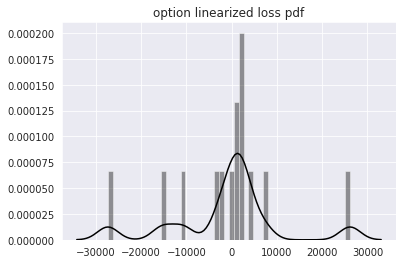

In [833]:
pdf_function1(option_loss,'option linearized loss pdf')

In [0]:
portfolio_linloss1=np.sum([option_loss,linloss_equity,linloss_bond], axis = 0)

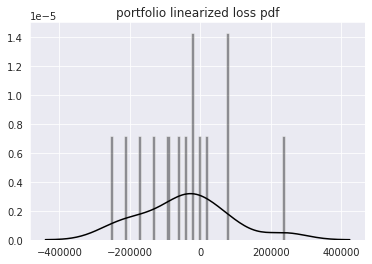

In [835]:
pdf_function1(portfolio_linloss1,'portfolio linearized loss pdf')

# **1.b) Portfolio t-distribution loss(2019.9.25-2020.4.22)**

In [836]:
t_period=weektime[-30:]
t_stock=week_stock[-30:]
len(t_stock)
t_period

[Timestamp('2019-09-25 00:00:00', freq='C'),
 Timestamp('2019-10-02 00:00:00', freq='C'),
 Timestamp('2019-10-09 00:00:00', freq='C'),
 Timestamp('2019-10-16 00:00:00', freq='C'),
 Timestamp('2019-10-23 00:00:00', freq='C'),
 Timestamp('2019-10-30 00:00:00', freq='C'),
 Timestamp('2019-11-06 00:00:00', freq='C'),
 Timestamp('2019-11-13 00:00:00', freq='C'),
 Timestamp('2019-11-20 00:00:00', freq='C'),
 Timestamp('2019-11-27 00:00:00', freq='C'),
 Timestamp('2019-12-04 00:00:00', freq='C'),
 Timestamp('2019-12-11 00:00:00', freq='C'),
 Timestamp('2019-12-18 00:00:00', freq='C'),
 Timestamp('2019-12-24 00:00:00'),
 Timestamp('2019-12-31 00:00:00'),
 Timestamp('2020-01-08 00:00:00', freq='C'),
 Timestamp('2020-01-15 00:00:00', freq='C'),
 Timestamp('2020-01-22 00:00:00', freq='C'),
 Timestamp('2020-01-29 00:00:00', freq='C'),
 Timestamp('2020-02-05 00:00:00', freq='C'),
 Timestamp('2020-02-12 00:00:00', freq='C'),
 Timestamp('2020-02-19 00:00:00', freq='C'),
 Timestamp('2020-02-26 00:00:0

In [0]:
stock_value=[]
for i in range(30):
  a=0
  for j in range(15):
    b=index_list[j]
    a+=t_stock[i].loc[b]['Adj Close']*t_stock[i].loc[b]['Share']
  stock_value.append(a)
#stock_value

In [0]:
stock_loss=[]
for i in range(29):
  a=stock_value[i+1]-stock_value[i]
  stock_loss.append(a)

In [839]:
bond10tprice=[0.57639,0.59218,0.59413,0.57203,0.56817,0.56815,0.55983,0.55275,0.57484,0.57900,0.57290,0.57439,0.55673,0.55915,0.55142,0.55335]+bond_price10
bond30tprice=[0.53646,0.55261,0.55369,0.53157,0.52788,0.52883,0.52192,0.51420,0.53706,0.54177,0.53544,0.53640,0.51922,0.52123,0.51292,0.51662]+bond_price30
len(bond10tprice)

30

In [0]:
share1=300000/0.57639
share2=300000/0.53646

In [0]:
bond_loss=[]
for i in range(29):
  a=share1*(bond10tprice[i+1]-bond10tprice[i])+share2*(bond30tprice[i+1]-bond30tprice[i])
  bond_loss.append(a)

In [842]:
len(bond_loss)

29

In [0]:
meli=[]
mmm=[]
spx=[]
for i in range(len(t_period)):
  time=t_period[i]
  a=MELI.loc[time]['Adj Close']
  b=MMM.loc[time]['Adj Close']
  c=10*SPY.loc[time]['Adj Close']
  meli.append(a)
  mmm.append(b)
  spx.append(c)

In [0]:
meli_sigma1=[0.421,0.396,0.396,0.391,0.316,0.311,0.381,0.374,0.365,0.358,0.371,0.367,0.298,0.282,0.27,0.275]+meli_sigma
mmm_sigma1=[0.216,0.204,0.204,0.214,0.207,0.219,0.224,0.222,0.217,0.197,0.193,0.186,0.187,0.19,0.19,0.196,]+mmm_sigma
spx_sigma1=[0.126,0.123,0.114,0.11,0.107,0.106,0.099,0.09,0.076,0.066,0.071,0.071,0.071,0.069,0.068,0.077]+spx_sigma

In [845]:
a=16+29+31+30+31+19+15+31+30+31+5
b=a-19+30+17
meli_maturity1=[a/365,]
mmm_maturity1=[b/365,]
for i in range(29):
  a=a-7
  b=b-7
  meli_maturity1.append(a/365)
  mmm_maturity1.append(b/365)
a=16+29+31+30+14+15+31+30+31+5
#2020.1.15--2020.5.14
spx_maturity1=[a/365,]
for i in range(29):
  a=a-7
  spx_maturity1.append(a/365)
spx_maturity1

[0.6356164383561644,
 0.6164383561643836,
 0.5972602739726027,
 0.5780821917808219,
 0.5589041095890411,
 0.5397260273972603,
 0.5205479452054794,
 0.5013698630136987,
 0.4821917808219178,
 0.46301369863013697,
 0.4438356164383562,
 0.4246575342465753,
 0.4054794520547945,
 0.3863013698630137,
 0.36712328767123287,
 0.34794520547945207,
 0.3287671232876712,
 0.3095890410958904,
 0.29041095890410956,
 0.27123287671232876,
 0.25205479452054796,
 0.2328767123287671,
 0.2136986301369863,
 0.19452054794520549,
 0.17534246575342466,
 0.15616438356164383,
 0.136986301369863,
 0.1178082191780822,
 0.09863013698630137,
 0.07945205479452055]

In [0]:
libor_list2=[0.01841,0.01851,0.01790,0.01826,0.01814,0.01804,0.01537,0.01539,0.01529,0.01540,0.01530,0.01525,0.01534,0.01533,0.01543,0.01533]+libor_list1

In [847]:
len(libor_list2)

30

In [0]:
spx_delta1=delta_finder(spx,spx_maturity1,2885,libor_list2,spx_sigma1)
meli_delta1=[i+1 for i in delta_finder(meli,meli_maturity1,640,libor_list2,meli_sigma1)]
mmm_delta1=[i+1 for i in delta_finder(mmm,mmm_maturity1,130,libor_list2,mmm_sigma1)]

In [0]:
option_loss1=[]
for i in range(29):
  a=100*meli_delta1[i]*(meli[i+1]-meli[i])
  b=200*mmm_delta1[i]*(mmm[i+1]-mmm[i])
  c=-100*spx_delta1[i]*(spx[i+1]-spx[i])
  d=a+b+c
  option_loss1.append(d)

In [850]:
option_loss1

[-5171.4527176857155,
 282.59513980236443,
 5509.203797632263,
 1345.3518448058835,
 1510.006725629094,
 -535.446712543237,
 427.89613267610093,
 680.5315583379402,
 2638.2620670534434,
 -1398.5609147950317,
 687.0624705573507,
 314.3705234909279,
 1995.4804271721746,
 -963.2051345843889,
 2777.0048412690085,
 1254.7716580071317,
 -142.89536794248573,
 -2826.393771376552,
 556.6578085278683,
 1878.9306472082967,
 2430.7717875116255,
 -10726.579381288739,
 2208.055409169762,
 -15239.884574675885,
 -27302.952664307373,
 6935.193247532321,
 -1785.708195284441,
 26150.89786563267,
 3780.7900922467697]

In [851]:
portfolio_actualloss=np.sum([option_loss1,stock_loss,bond_loss], axis = 0)
portfolio_actualloss

array([ -22441.30101498,   28993.9781835 ,   66314.48234905,
         -2376.03500571,  101236.63749121,   -2205.58149999,
         50589.73261822,   52681.40885506,   51715.99443491,
        -49391.30365011,   49975.56249288,   55773.77210704,
         75246.24958863,  -37184.64547697,  104070.31325834,
         88031.32251857,   61361.78829297,    8315.87507035,
        174864.76523832,  135823.97168693,  294558.367492  ,
       -351764.81628466,   52332.82202702, -325766.57839654,
       -592541.98677664,  399534.74988425,  -27106.01579393,
        261645.50167354,  264018.08067901])

In [0]:
from scipy import stats

t_loss_list=[]
df_list=[]
for j in range(16):
  loss_for_estimate=portfolio_actualloss[j:j+13]
  para_t=stats.t.fit(loss_for_estimate)
  df_list.append(para_t[0])
  a=stats.t.rvs(loc = para_t[1], df = para_t[0], scale = para_t[2])
  t_loss_list.append(a)


In [853]:
t_loss_list

[72787.72150973484,
 86153.4551033423,
 -23552.70326045309,
 53525.02243784392,
 110486.75994516312,
 22017.463641895294,
 12007.078591856356,
 172073.18207228676,
 59040.18175277779,
 10248.28136875989,
 118335.2681079116,
 139497.37959650904,
 -4558224.732974762,
 299243.97932205256,
 73107.76772230038,
 741024.1863809758]

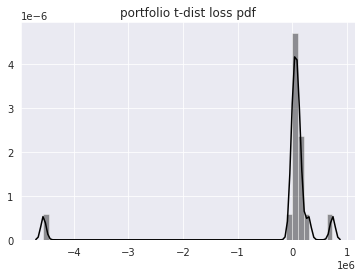

In [854]:
pdf_function1(t_loss_list,'portfolio t-dist loss pdf')

# **Now we work on 2.stress test**



# **Now we work on the first scenario --- financial crisis 2008~2009**

In [855]:
B30= drd.get_data_yahoo('^TYX','05/07/2008','05/11/2009',interval='d')
tradingdays2=B30.index
tradingdays2
len(tradingdays2)

251

In [856]:
weektime2=[]
for i in tradingdays2:
  if i.weekday() == 2:
    weektime2.append(i)
len(weektime2)

51

In [857]:
nan_list=[]
nan_index=[]
for i in range(50):
  if weektime2[i+1]-weektime2[i] != pd.Timedelta('7 days'):
    nan_list.append(weektime2[i])
    nan_index.append(i)


#weektime: wednesday date list
#weektime[-1]
print(nan_index)
print(nan_list)

[32]
[Timestamp('2008-12-17 00:00:00')]


In [858]:
p1=pd.Timestamp(2008,12,23)
p2=pd.Timestamp(2008,12,30)
weektime2.insert(33,p1)
weektime2.insert(34,p2)
weektime2

[Timestamp('2008-05-07 00:00:00'),
 Timestamp('2008-05-14 00:00:00'),
 Timestamp('2008-05-21 00:00:00'),
 Timestamp('2008-05-28 00:00:00'),
 Timestamp('2008-06-04 00:00:00'),
 Timestamp('2008-06-11 00:00:00'),
 Timestamp('2008-06-18 00:00:00'),
 Timestamp('2008-06-25 00:00:00'),
 Timestamp('2008-07-02 00:00:00'),
 Timestamp('2008-07-09 00:00:00'),
 Timestamp('2008-07-16 00:00:00'),
 Timestamp('2008-07-23 00:00:00'),
 Timestamp('2008-07-30 00:00:00'),
 Timestamp('2008-08-06 00:00:00'),
 Timestamp('2008-08-13 00:00:00'),
 Timestamp('2008-08-20 00:00:00'),
 Timestamp('2008-08-27 00:00:00'),
 Timestamp('2008-09-03 00:00:00'),
 Timestamp('2008-09-10 00:00:00'),
 Timestamp('2008-09-17 00:00:00'),
 Timestamp('2008-09-24 00:00:00'),
 Timestamp('2008-10-01 00:00:00'),
 Timestamp('2008-10-08 00:00:00'),
 Timestamp('2008-10-15 00:00:00'),
 Timestamp('2008-10-22 00:00:00'),
 Timestamp('2008-10-29 00:00:00'),
 Timestamp('2008-11-05 00:00:00'),
 Timestamp('2008-11-12 00:00:00'),
 Timestamp('2008-11-

**Use CYTK TO SUBSTITUTE TSLA; USE ADS TO SUBSTITUTE YELP**

In [0]:
AAPL= drd.get_data_yahoo('AAPL','05/07/2008','05/11/2009',interval='d')
CYTK= drd.get_data_yahoo('CYTK','05/07/2008','05/11/2009',interval='d')
GILD= drd.get_data_yahoo('GILD','05/07/2008','05/11/2009',interval='d')
MELI= drd.get_data_yahoo('MELI','05/07/2008','05/11/2009',interval='d')
MSFT= drd.get_data_yahoo('MSFT','05/07/2008','05/11/2009',interval='d')
DIS= drd.get_data_yahoo('DIS','05/07/2008','05/11/2009',interval='d')
NVDA= drd.get_data_yahoo('NVDA','05/07/2008','05/11/2009',interval='d')
TCO= drd.get_data_yahoo('TCO','05/07/2008','05/11/2009',interval='d')
MMM= drd.get_data_yahoo('MMM','05/07/2008','05/11/2009',interval='d')
INCY= drd.get_data_yahoo('INCY','05/07/2008','05/11/2009',interval='d')
IBM= drd.get_data_yahoo('IBM','05/07/2008','05/11/2009',interval='d')
EPC= drd.get_data_yahoo('EPC','05/07/2008','05/11/2009',interval='d')
SPY= drd.get_data_yahoo('SPY','05/07/2008','05/11/2009',interval='d')
ADS= drd.get_data_yahoo('ADS','05/07/2008','05/11/2009',interval='d')
VTI= drd.get_data_yahoo('VTI','05/07/2008','05/11/2009',interval='d')

In [860]:
for i in range(len(tradingdays2)):
  a=tradingdays2[i]
  b=ADS.loc[a,'Adj Close']
  ADS.loc[a,'Adj Close']=b/2.2
ADS

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2008-05-07,59.430000,57.400002,58.000000,58.230000,1827700,25.263094
2008-05-08,59.099998,57.689999,59.090000,58.500000,778600,25.380239
2008-05-09,59.669998,57.849998,57.849998,59.110001,956400,25.644882
2008-05-12,59.470001,58.840000,58.930000,59.250000,1168900,25.705625
2008-05-13,59.930000,56.730000,59.250000,59.330002,1249100,25.740329
...,...,...,...,...,...,...
2009-05-05,42.450001,41.160000,41.590000,42.099998,1037200,18.265091
2009-05-06,42.900002,41.680000,42.830002,42.380001,1825500,18.386572
2009-05-07,43.480000,41.380001,42.840000,41.910000,1519700,18.182661


In [0]:
stock_list=[AAPL,CYTK,GILD,MELI,MSFT,DIS,NVDA,TCO,MMM,INCY,IBM,EPC,SPY,ADS,VTI]
index_list=['AAPL','CYTK','GILD','MELI','MSFT','DIS','NVDA','TCO','MMM','INCY','IBM','EPC','SPY','ADS','VTI']


In [0]:
from datetime import date
total_num=len(tradingdays2)
date_list2=[]
for i in range(total_num-1):
  if tradingdays2[i].day > tradingdays2[i+1].day:
    date_list2.append(tradingdays2[i])

def new_portfolio():
    res = pd.DataFrame(columns=['Share', 'Adj Close'],index=pd.Series(index_list))
    return res

my_port = new_portfolio()
update_list=[]

for j in range(len(date_list2)):
  b=date_list2[j]
  my_port=new_portfolio()
  for i in range(len(index_list)):
    a=index_list[i]
    my_port.loc[a,'Adj Close']=stock_list[i].loc[b,'Adj Close']
  update_list.append(my_port)

for i in range(len(index_list)):
    a=index_list[i]
    update_list[0].loc[a,'Share']=(400000/15)/update_list[0].loc[a,'Adj Close']

def total_value(portfolio1,portfolio2):
  res=0
  for i in range(len(index_list)):
    a=index_list[i]
    res+=portfolio1.loc[a,'Share']*portfolio2.loc[a,'Adj Close']
  return res

for i in range(len(update_list)-1):
  to_value=total_value(update_list[i],update_list[i+1])
  for j in range(len(index_list)):
    a=index_list[j]
    update_list[i+1].loc[a,'Share']=(to_value/15)/update_list[i+1].loc[a,'Adj Close']

In [863]:
len(update_list)

12

In [0]:
week_stock2=[] #所有Wednesday的portfolio

for j in range(len(weektime2)):
  b=weektime2[j]
  my_port=new_portfolio()
  for i in range(len(index_list)):
    a=index_list[i]
    my_port.loc[a]['Adj Close']=stock_list[i].loc[b]['Adj Close']
  week_stock2.append(my_port)
week_stock2

m=0
for i in range(len(week_stock2)):
  if weektime2[i].month <= date_list2[m].month:
    for j in range(len(index_list)):
      a=index_list[j]
      week_stock2[i].loc[a]['Share']=update_list[m+1].loc[a]['Share']
  else:
    m+=1
    for j in range(len(index_list)):
      a=index_list[j]
      week_stock2[i].loc[a]['Share']=update_list[m+1].loc[a]['Share']

In [865]:
len(week_stock2)

53

In [866]:
stock_value=[]
for j in range(len(week_stock2)):
  v=0
  for i in range(len(index_list)):
    a=index_list[i]
    v+=week_stock2[j].loc[a,'Adj Close']*week_stock2[j].loc[a,'Share']
  stock_value.append(v)

len(stock_value)
  

53

In [0]:
stock_loss=[]
for i in range(52):
  a=stock_value[i+1]-stock_value[i]
  stock_loss.append(-a)

In [868]:
np.mean(np.array(stock_loss))

2500.7054068791713

In [0]:
bond30= drd.get_data_yahoo('^TYX','05/07/2008','05/11/2009',interval='d')

In [870]:
for i in range(len(tradingdays2)):
  a=tradingdays2[i]
  b=bond30.loc[a,'Adj Close']
  bond30.loc[a,'Adj Close']=b*0.01
bond30

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2008-05-07,4.688,4.607,4.646,4.622,0.0,0.04622
2008-05-08,4.636,4.557,4.625,4.564,0.0,0.04564
2008-05-09,4.544,4.490,4.501,4.524,0.0,0.04524
2008-05-12,4.539,4.475,4.537,4.522,0.0,0.04522
2008-05-13,4.621,4.501,4.504,4.619,0.0,0.04619
...,...,...,...,...,...,...
2009-05-05,4.107,4.032,4.049,4.053,0.0,0.04053
2009-05-06,4.106,4.037,4.088,4.082,0.0,0.04082
2009-05-07,4.307,4.132,4.144,4.261,0.0,0.04261


In [871]:
week_bond=[]
for i in range(len(weektime2)):
  a=weektime2[i]
  b=bond30.loc[a,'Adj Close']
  week_bond.append(b)
week_bond

[0.04622000217437744,
 0.0463700008392334,
 0.04558000087738037,
 0.04697000026702881,
 0.046849999427795413,
 0.04702000141143799,
 0.04730000019073487,
 0.04657000064849853,
 0.04502999782562256,
 0.04427999973297119,
 0.045819997787475586,
 0.04699999809265137,
 0.04638000011444092,
 0.04690000057220459,
 0.04576000213623047,
 0.04442999839782715,
 0.04382999897003174,
 0.04317999839782715,
 0.04224999904632568,
 0.04080999851226807,
 0.04377999782562256,
 0.04248000144958496,
 0.040630002021789555,
 0.04248000144958496,
 0.04087999820709229,
 0.0423799991607666,
 0.041539998054504396,
 0.04190000057220459,
 0.039719998836517334,
 0.035629999637603764,
 0.031840000152587894,
 0.030950000286102296,
 0.026649999618530273,
 0.02632999897003174,
 0.025829999446868895,
 0.03065999984741211,
 0.028949999809265138,
 0.03138000011444092,
 0.03434000015258789,
 0.036730000972747805,
 0.034519999027252196,
 0.03525000095367432,
 0.036010000705719,
 0.03697999954223633,
 0.03657000064849854,
 

In [872]:
a=27
maturity_list=[a,]
for i in range(len(weektime2)-1):
  a=a-7/365
  maturity_list.append(a)
maturity_list


[27,
 26.980821917808218,
 26.961643835616435,
 26.942465753424653,
 26.92328767123287,
 26.904109589041088,
 26.884931506849306,
 26.865753424657523,
 26.84657534246574,
 26.82739726027396,
 26.808219178082176,
 26.789041095890394,
 26.76986301369861,
 26.75068493150683,
 26.731506849315046,
 26.712328767123264,
 26.69315068493148,
 26.6739726027397,
 26.654794520547917,
 26.635616438356134,
 26.616438356164352,
 26.59726027397257,
 26.578082191780787,
 26.558904109589005,
 26.539726027397222,
 26.52054794520544,
 26.501369863013657,
 26.482191780821875,
 26.463013698630093,
 26.44383561643831,
 26.424657534246528,
 26.405479452054745,
 26.386301369862963,
 26.36712328767118,
 26.347945205479398,
 26.328767123287616,
 26.309589041095833,
 26.29041095890405,
 26.27123287671227,
 26.252054794520486,
 26.232876712328704,
 26.21369863013692,
 26.19452054794514,
 26.175342465753356,
 26.156164383561574,
 26.13698630136979,
 26.11780821917801,
 26.098630136986227,
 26.079452054794444,
 26.0

In [0]:
bond_price=[]
for i in range(len(weektime2)):
  a=np.exp(-maturity_list[i]*week_bond[i])
  bond_price.append(a)

In [874]:
bond_price

[0.2870955882103808,
 0.28618960451409126,
 0.2926108383133809,
 0.28210170313915467,
 0.2832696489075728,
 0.28223047041576943,
 0.28036659469094216,
 0.2861788956606537,
 0.29852510993664105,
 0.3048555736561417,
 0.2927745138850059,
 0.2839137226643739,
 0.288925546207948,
 0.2851878655250475,
 0.29427699052823186,
 0.30518756495450894,
 0.31037911812203806,
 0.31607299531147653,
 0.32427445349404516,
 0.33722683734295544,
 0.3118391985298803,
 0.3230811803473769,
 0.33964051376146454,
 0.3236080282023702,
 0.33792072500393944,
 0.32499652154085984,
 0.3325826585790118,
 0.3296895414669211,
 0.3495492284404695,
 0.38977179449928234,
 0.4311233219796787,
 0.4416446866270369,
 0.4950012845128927,
 0.49945072769763,
 0.5063296143138778,
 0.44608757221315637,
 0.4668895318849006,
 0.4382380167792822,
 0.4056947939996242,
 0.38127362028285344,
 0.4043158584706299,
 0.3969150894252205,
 0.38935463077798604,
 0.3798555795176408,
 0.384223467721317,
 0.39313069794125305,
 0.3787802969163156

In [875]:
bondshare=600000/bond_price[0]
bond_loss=[]
for i in range(len(weektime2)-1):
  a=bondshare*(bond_price[i+1]-bond_price[i])
  bond_loss.append(-a)
bond_loss

[1893.4119509192096,
 -13419.712589768349,
 21963.002440550063,
 -2440.885509314587,
 2171.77525774137,
 3895.3069319785695,
 -12147.106138292163,
 -25802.307209834624,
 -13230.012538252731,
 25248.161798187353,
 18518.13455413789,
 -10474.19134821707,
 7811.364931518766,
 -18995.328475456656,
 -22801.96883753278,
 -10849.807619596297,
 -11899.612721180645,
 -17140.19689475411,
 -27069.138741523766,
 53057.53175378929,
 -23494.575909523006,
 -34607.28919725471,
 33506.231828291,
 -29912.051712367684,
 27010.244658184445,
 -15854.239527901618,
 6046.314671970533,
 -41504.68580310349,
 -84060.99092544362,
 -86420.4031935754,
 -21988.56077087799,
 -111509.7550995942,
 -9298.874731875234,
 -14376.159506582924,
 125899.61930709293,
 -43473.93800388347,
 59878.69465543206,
 68011.96002178335,
 51037.719950350154,
 -48155.88772661598,
 15466.8396506034,
 15800.57435440823,
 19852.031832793786,
 -9128.433280852987,
 -18615.18724573837,
 29990.84962828817,
 -48037.16708346496,
 34825.5318353067

In [876]:
np.mean(np.array(bond_loss))

-2365.7838517171867

In [0]:
libor2008=[0.02211,0.02203,0.02109,0.02429,0.02216,0.02095,0.02091,0.02105,0.02444,0.02328,0.02194,0.02098,0.02350,0.02193,0.02184,0.02096,0.02150,0.02163,0.02130,0.05031,0.02688,0.03794,0.05375,0.02144,0.01119,0.01140,0.00323,0.00383,0.00438,0.00988,0.00881,0.00125,0.00133,0.00118,0.00139,0.00108,0.00105,0.00188,0.00224,0.00319,0.00301,0.00304,0.00270,0.00313,0.00329,0.00309,0.00288,0.00296,0.00260,0.00263,0.00206,0.00228,0.00242]

In [878]:
len(libor2008)

53

In [879]:
MELI

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2008-05-07,57.560001,54.000000,55.560001,56.049999,1631600,54.312321
2008-05-08,57.709999,54.270000,56.360001,55.000000,1597600,53.294876
2008-05-09,55.980000,53.650002,54.639999,54.020000,1059600,52.345264
2008-05-12,53.990002,50.110001,53.799999,52.259998,1473600,50.639824
2008-05-13,56.560001,52.590000,52.590000,55.860001,2504400,54.128220
...,...,...,...,...,...,...
2009-05-05,28.070000,27.100000,27.160000,27.889999,587300,27.025349
2009-05-06,29.580000,27.889999,28.299999,28.940001,1223200,28.042793
2009-05-07,27.750000,22.030001,27.290001,23.580000,3495900,22.848967


In [880]:
meli_sigma=drd.get_data_yahoo('MELI','08/09/2007','05/06/2009',interval='d')
len(meli_sigma)
tradingdays3=meli_sigma.index
vol=[]
for i in range(len(weektime2)):
  a=list(tradingdays3).index(weektime2[i])
  b=np.log(np.array(meli_sigma[:a]['Adj Close'])).std()
  vol.append(b)
vol

[0.23302301663852237,
 0.23420597314925293,
 0.23476809309319754,
 0.2328773873577797,
 0.23039072011432887,
 0.22801550856125813,
 0.2257616453257282,
 0.22354419264913838,
 0.22236367842798746,
 0.22576615775610845,
 0.2274382281998453,
 0.22679488388530186,
 0.22676274123466225,
 0.22601264634591184,
 0.22443172949162637,
 0.2239003309988104,
 0.22549520040033677,
 0.22643878284044577,
 0.2297551304690211,
 0.2351654072620489,
 0.23889419709318774,
 0.24868460542422816,
 0.2650460336823241,
 0.2777473245399257,
 0.2920927289292302,
 0.32204355541654867,
 0.3431326255840718,
 0.3672900359778705,
 0.39454581836615493,
 0.4233387232593027,
 0.43783828742287645,
 0.45042592795541586,
 0.45624254365264355,
 0.4620430417577689,
 0.4680140317580413,
 0.4705497435169148,
 0.4740134102294971,
 0.4787776429950007,
 0.4862548730449311,
 0.49265746067398114,
 0.49619315841258405,
 0.4979299971043456,
 0.5020159040987973,
 0.5038678652181812,
 0.506669714580742,
 0.5072476570869936,
 0.507861763

**K for MELI is 45, maturity date is 2009/06/01 (covered call)**

**K for MMM is 45, maturity date is 2009/06/01 (covered call)**

**K for SPX is 1040, maturity date is 2009/06/01 (PUT)**

In [0]:
a=24+30+31+31+30+31+30+31+31+28+31+30+31+1
#2008.05.07---2009.06.01
maturity=[a/365,]
for i in range(len(weektime2)-1):
  a=a-7
  maturity.append(a/365)

In [0]:
import scipy.stats as ss
meli_option=[]
otype=1
for i in range(len(weektime2)):
  a=weektime2[i]
  d1 = (np.log(MELI.loc[a,'Adj Close'] / 45) + (libor2008[i] + 0.5 * vol[i] ** 2) * maturity[i]) / (vol[i] * np.sqrt(maturity[i]))
  d2 = d1 - vol[i] * np.sqrt(maturity[i])
  price=(otype * MELI.loc[a,'Adj Close'] * ss.norm.cdf(otype * d1) - otype * np.exp(-libor2008[i] * maturity[i]) * 45 * ss.norm.cdf(otype * d2))
  meli_option.append(price)


In [883]:
meli_option

[11.585747023905796,
 9.838117507086672,
 7.226866749142065,
 3.8764643882404144,
 4.483161673690237,
 1.0496467495940403,
 1.4695615915343012,
 1.1688172133967694,
 0.22842408287165572,
 0.12284534986347184,
 0.3293147957014382,
 0.2886941649893986,
 0.22121122523165315,
 0.3972354709894157,
 0.2976466679570282,
 0.06786532420284486,
 0.040826258345392774,
 0.022068002096400974,
 0.003909933696076548,
 0.0011643035889184056,
 0.001253653521949255,
 5.54764591628894e-05,
 5.111994817840761e-05,
 1.7965554336157592e-05,
 1.2859969032074116e-07,
 1.3099722568054024e-07,
 2.147148748602972e-06,
 4.505817830637363e-08,
 9.345305805794172e-09,
 6.970297963196118e-06,
 5.2968440449638565e-06,
 0.00047402942386449987,
 0.00015259596883176064,
 9.200626827953785e-05,
 0.00031712098133878774,
 0.0007889958940395913,
 5.9742257047783014e-05,
 9.34917504826055e-06,
 2.4819627826401795e-05,
 1.3801917820791047e-05,
 0.00020201740333210868,
 8.339527200226674e-06,
 2.3060305779398803e-05,
 5.539801

In [0]:
a=weektime2[0]
share_meli=400000/(15*MELI.loc[a,'Adj Close'])
share_meli
meli_loss=[]
for i in range(len(meli_option)-1):
  loss=500*(meli_option[i+1]-meli_option[i])
  meli_loss.append(loss)

In [885]:
meli_loss

[-873.8147584095622,
 -1305.6253789723035,
 -1675.2011804508254,
 303.34864272491126,
 -1716.7574620480982,
 209.95742097013047,
 -150.37218906876592,
 -470.1965652625568,
 -52.78936650409194,
 103.23472291898317,
 -20.310315356019792,
 -33.74146987887272,
 88.01212287888127,
 -49.794401516193744,
 -114.89067187709168,
 -13.519532928726042,
 -9.3791281244959,
 -9.079034200162212,
 -1.372815053579071,
 0.04467496651542474,
 -0.5990885313931829,
 -0.0021782554922408943,
 -0.01657719692112501,
 -0.008918477322918426,
 1.198767679899541e-06,
 0.0010080757614612157,
 -0.001051045285148299,
 -1.785643625028973e-05,
 0.003480476328695162,
 -0.0008367269591161308,
 0.234366289909768,
 -0.16071672751636962,
 -0.030294850276111392,
 0.11255735652962494,
 0.23593745635040178,
 -0.3646268184959041,
 -0.025196540999761232,
 0.007735226389070623,
 -0.005508855002805374,
 0.09410774275565882,
 -0.096838938065941,
 0.007360389289586065,
 -0.008760252023067527,
 0.0044998160287169145,
 -0.0037077961622

In [0]:
def vol_finder(sigma,weektime):
  len(sigma)
  tradingdays3=sigma.index
  vol=[]
  for i in range(len(weektime)):
    a=list(tradingdays3).index(weektime[i])
    b=np.log(np.array(sigma[:a]['Adj Close'])).std()
    vol.append(b)
  return vol
  
def option_finder(stock,libor,vol,k,maturity,weektime,otype):
  option=[]
  for i in range(len(weektime)):
    a=weektime[i]
    d1 = (np.log(stock.loc[a,'Adj Close'] / k) + (libor[i] + 0.5 * vol[i] ** 2) * maturity[i]) / (vol[i] * np.sqrt(maturity[i]))
    d2 = d1 - vol[i] * np.sqrt(maturity[i])
    price=(otype * stock.loc[a,'Adj Close'] * ss.norm.cdf(otype * d1) - otype * np.exp(-libor[i] * maturity[i]) * k * ss.norm.cdf(otype * d2))
    option.append(price)
  return option

In [0]:
mmm_sigma=drd.get_data_yahoo('MMM','08/09/2007','05/06/2009',interval='d')
mmm_vol=vol_finder(mmm_sigma,weektime2)
spx_sigma=drd.get_data_yahoo('SPY','08/09/2007','05/06/2009',interval='d')
spx_vol=vol_finder(spx_sigma,weektime2)

In [888]:
MMM

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2008-05-07,78.129997,76.489998,77.949997,76.680000,4089200.0,55.537189
2008-05-08,77.360001,76.470001,77.120003,76.949997,3796000.0,55.732716
2008-05-09,76.669998,75.820000,75.989998,76.320000,3871600.0,55.276447
2008-05-12,77.669998,75.949997,76.669998,77.669998,3552100.0,56.254223
2008-05-13,78.339996,76.910004,77.720001,77.180000,3407400.0,55.899319
...,...,...,...,...,...,...
2009-05-05,58.759998,57.779999,58.419998,58.430000,4302400.0,43.712578
2009-05-06,59.360001,57.830002,58.740002,59.139999,5067100.0,44.243744
2009-05-07,59.560001,57.970001,59.009998,58.770000,5627600.0,43.966942


In [889]:
for i in range(len(tradingdays2)):
  a=tradingdays2[i]
  b=SPY.loc[a,'Adj Close']
  SPY.loc[a,'Adj Close']=b*10
SPY

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2008-05-07,142.039993,139.130005,141.889999,139.520004,199267300.0,1089.219208
2008-05-08,140.320007,138.979996,139.740005,139.160004,178321200.0,1086.408615
2008-05-09,139.389999,138.449997,138.600006,138.899994,152588200.0,1084.379044
2008-05-12,140.559998,138.729996,139.250000,140.460007,147865900.0,1096.557922
2008-05-13,140.889999,139.729996,140.800003,140.479996,159132200.0,1096.714096
...,...,...,...,...,...,...
2009-05-05,90.930000,89.839996,90.570000,90.570000,243036300.0,725.680237
2009-05-06,92.199997,90.610001,91.680000,92.139999,291941000.0,738.259506
2009-05-07,93.150002,90.279999,93.010002,90.860001,317728000.0,728.003845


In [890]:
mmm_option=option_finder(MMM,libor2008,mmm_vol,45,maturity,weektime2,1)
spx_option=option_finder(SPY,libor2008,spx_vol,1040,maturity,weektime2,-1)
spx_option

[2.105232846713278,
 1.326253796310077,
 1.9454931580232113,
 1.6878797699780392,
 2.652301677021242,
 8.628419108060086,
 7.916300289916649,
 12.35729493266274,
 35.07345821585159,
 44.74905576793094,
 51.90657437226139,
 29.13292963381423,
 26.63713027901224,
 25.975507881055364,
 27.791642791927075,
 33.26330141538676,
 27.991508624357493,
 31.674076529078434,
 56.9607989747592,
 89.49365773739498,
 83.54312840666546,
 98.69040230021369,
 234.99006580051753,
 315.72327968506306,
 317.6723106247325,
 298.51146038199056,
 279.0190584546639,
 360.571745793256,
 394.4353369187397,
 332.6552198667641,
 346.41795400527405,
 328.296770163415,
 321.34193244652124,
 354.02698720863,
 331.60749608211756,
 318.2425680453596,
 368.3882389959624,
 370.64500737354126,
 343.98536788966203,
 376.011543014862,
 373.98354676509996,
 410.39090347512627,
 427.72805998989804,
 468.56371634861785,
 461.34921056469443,
 403.46250438058473,
 386.8346479901114,
 390.0030818341545,
 378.3393528283815,
 356.5

In [891]:
a=weektime2[0]
share_mmm=400000/(15*MMM.loc[a,'Adj Close'])
share_mmm

480.15873533753137

In [892]:
mmm_loss=[]
for i in range(len(mmm_option)-1):
  loss=500*(mmm_option[i+1]-mmm_option[i])
  mmm_loss.append(loss)
mmm_loss

[369.07291207266724,
 -434.7115710148941,
 346.52686024302784,
 -253.50245119912174,
 -432.5466421144988,
 -363.1973102950923,
 -636.0854856856264,
 -1420.1277709362935,
 26.693621757853947,
 -31.222911621899385,
 748.2984965411283,
 218.35173279630027,
 146.73151734167078,
 406.2148372544989,
 -666.3784406661257,
 10.947686432054127,
 32.795574258052795,
 -791.8723452878069,
 491.58604129891967,
 -467.04202145621207,
 -275.14102729641013,
 -2512.1885196773883,
 -244.4104175588351,
 237.51332043605024,
 756.5298610982944,
 447.6178085621143,
 -1072.0080219518495,
 -22.475103696200982,
 1730.5476539193983,
 -1398.2313340186874,
 -486.72307792706613,
 124.97180655293505,
 -268.8101551840938,
 120.05661111740685,
 85.22093809875653,
 -227.6078821266827,
 -30.331529314536088,
 47.158005221558774,
 -98.88787761683143,
 2.5754336218553053,
 -9.367695438827969,
 -0.17340022388981186,
 -0.2574690082130606,
 0.39260824933844185,
 2.5321729372129247,
 -1.0056608671742129,
 3.4079040074326272,
 1

In [893]:
a=weektime2[0]
share_spx=400000/(15*SPY.loc[a,'Adj Close'])
share_spx

24.482369092092377

In [894]:
spx_loss=[]
for i in range(len(spx_option)-1):
  loss=100*(spx_option[i+1]-spx_option[i])
  spx_loss.append(-loss)
spx_loss

[77.89790504032013,
 -61.92393617131344,
 25.76133880451721,
 -96.4421907043203,
 -597.6117431038845,
 71.21188181434377,
 -444.0994642746091,
 -2271.616328318885,
 -967.5597552079353,
 -715.7518604330448,
 2277.364473844716,
 249.57993548019886,
 66.16223979568758,
 -181.61349108717104,
 -547.1658623459689,
 527.179279102927,
 -368.25679047209405,
 -2528.6722445680766,
 -3253.2858762635783,
 595.0529330729523,
 -1514.7273893548231,
 -13629.966350030383,
 -8073.321388454553,
 -194.90309396694556,
 1916.0850242741958,
 1949.2401927326682,
 -8155.268733859213,
 -3386.359112548371,
 6178.011705197559,
 -1376.2734138509927,
 1812.1183841859079,
 695.4837716893735,
 -3268.5054762108734,
 2241.949112651241,
 1336.4928036757988,
 -5014.5670950602835,
 -225.6768377578851,
 2665.963948387923,
 -3202.6175125199984,
 202.79962497620545,
 -3640.7356710026306,
 -1733.7156514771777,
 -4083.5656358719802,
 721.4505783923414,
 5788.67061841097,
 1662.7856390473312,
 -316.8433844043079,
 1166.372900577

In [895]:
stress_loss=np.sum([meli_loss,spx_loss,mmm_loss,bond_loss,stock_loss], axis = 0)
stress_loss

array([  -3342.55362999,   -4716.2774919 ,   18770.26301103,
        -14901.99990196,   22772.15227733,    -485.50305535,
         -6697.79475812,   -4296.35200371,   -1117.91533718,
         14250.05236628,    7889.55319742,   -9465.42715738,
         -7608.09283058,  -17654.83453418,  -19693.52049014,
        -11155.34202598,  -19539.98683315,   -5137.72473484,
         -2516.79053305,   43358.68375431,  -13003.64984787,
         12966.93998418,   51699.28961872,  -35402.7352227 ,
         39018.54192131,  -23020.65492798,   27977.24734243,
        -26330.59328187, -102115.48669742,  -80881.99510243,
        -40087.1300339 , -110663.89783543,   -5357.98016961,
        -20508.16022113,  118925.06700863,  -24690.61520485,
         59849.0062703 ,   64077.9689263 ,   57602.60418897,
        -49924.7394894 ,   26000.89492394,   20029.85400316,
         23717.60779393,  -12401.22728717,  -27536.71862823,
         25519.14433018,  -48882.23529528,   27065.71964457,
         -9561.47814334,

In [896]:
stress_loss.sort()
stress_loss

array([-110663.89783543, -102115.48669742,  -80881.99510243,
        -49924.7394894 ,  -48882.23529528,  -40087.1300339 ,
        -35402.7352227 ,  -27536.71862823,  -26330.59328187,
        -24690.61520485,  -23020.65492798,  -20508.16022113,
        -19693.52049014,  -19539.98683315,  -17654.83453418,
        -14901.99990196,  -13003.64984787,  -12401.22728717,
        -11155.34202598,   -9561.47814334,   -9465.42715738,
         -7608.09283058,   -6697.79475812,   -5357.98016961,
         -5137.72473484,   -4716.2774919 ,   -4296.35200371,
         -3342.55362999,   -2516.79053305,   -1117.91533718,
          -485.50305535,    1297.50552433,    7889.55319742,
         12966.93998418,   14250.05236628,   18770.26301103,
         20029.85400316,   22772.15227733,   23717.60779393,
         25519.14433018,   26000.89492394,   27065.71964457,
         27977.24734243,   29080.14159982,   32591.93090439,
         39018.54192131,   43358.68375431,   51699.28961872,
         57602.60418897,

In [897]:
len(stress_loss)

52

# **make PDF graph**

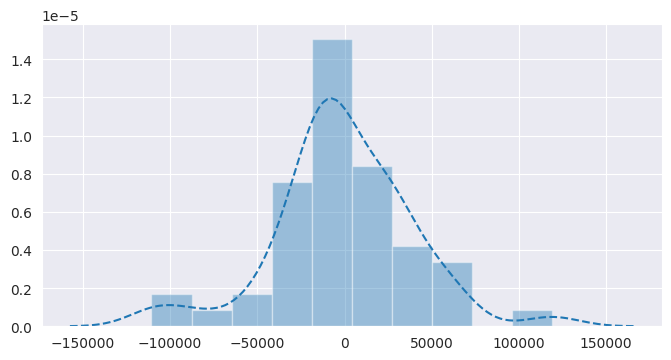

In [898]:
sns.set_style("darkgrid")
plt.figure(figsize=(8,4),dpi=100)  
sns.distplot(stress_loss,hist=True, kde=True, rug=False,norm_hist = True,
kde_kws={'linestyle':'--'}, 
label='stress loss')

# **Set 10 bins to make histogram**

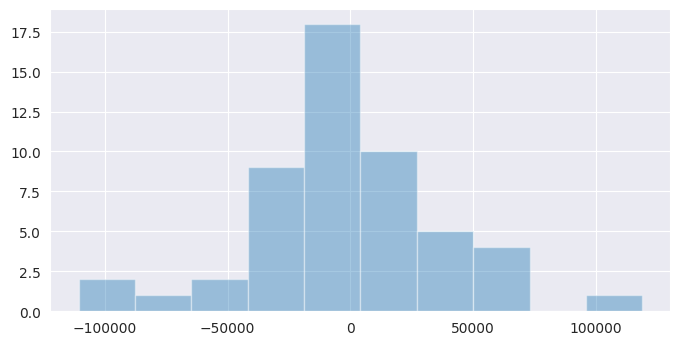

In [899]:
sns.set_style("darkgrid")
plt.figure(figsize=(8,4),dpi=100)  
sns.distplot(stress_loss, bins=10,hist=True, kde=False, rug=False,norm_hist = False,
kde_kws={'linestyle':'--'}, 
label='stress loss')

# **make Empirical loss distribution graph**

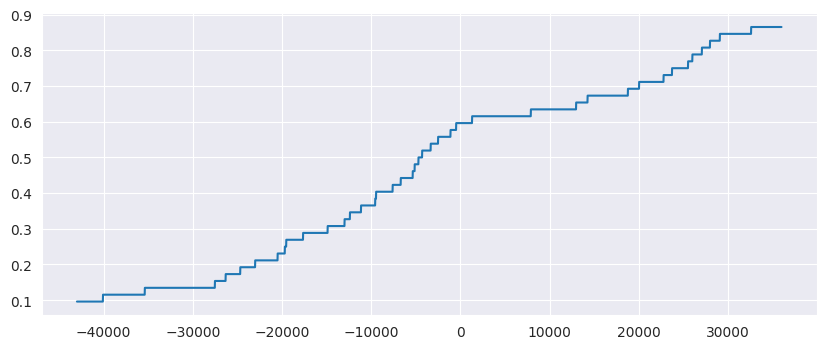

In [900]:
plt.figure(figsize=(10,4),dpi=100) 
length=len(stress_loss)
x=np.linspace(-43000,36000,8000)
y=[]
for i in range(8000):
  m=x[i]
  function=[0]*(length+1)
  if m<stress_loss[0]:
    function[0]=0
  if m>=stress_loss[(length-1)]:
    function[length]=1
  for j in range((length-1)):
    if m>=stress_loss[j] and m<stress_loss[j+1]:
      function[j+1]=(1+j)/length
  b=0
  for n in range((length+1)):
    b+=function[n]
  y.append(b)
plt.plot(x,y)

# **因为python实现不了断点作图，所以在每一段端点python绘图都连上了，实际情况在每一段端点处应断开，每一段都取左端点不取右端点，写report的时候注明。**

In [901]:
0.99*53

52.47

In [902]:
0.95*53

50.349999999999994

**SVAR0.99 = 118925.06**

**SVAR0.95 = 59849.01**

# **Now we work on the second scenario --- global economic crisis 2015~2016**

In [903]:
B30= drd.get_data_yahoo('^TYX','08/19/2015','08/16/2016',interval='d')
tradingdays2=B30.index
tradingdays2
len(tradingdays2)

weektime2=[]
for i in tradingdays2:
  if i.weekday() == 2:
    weektime2.append(i)
len(weektime2)

nan_list=[]
nan_index=[]
for i in range(50):
  if weektime2[i+1]-weektime2[i] != pd.Timedelta('7 days'):
    nan_list.append(weektime2[i])
    nan_index.append(i)


#weektime: wednesday date list
#weektime[-1]
print(nan_index)
print(nan_list)

[]
[]


In [0]:
AAPL= drd.get_data_yahoo('AAPL','08/19/2015','08/16/2016',interval='d')
TSLA= drd.get_data_yahoo('TSLA','08/19/2015','08/16/2016',interval='d')
GILD= drd.get_data_yahoo('GILD','08/19/2015','08/16/2016',interval='d')
MELI= drd.get_data_yahoo('MELI','08/19/2015','08/16/2016',interval='d')
MSFT= drd.get_data_yahoo('MSFT','08/19/2015','08/16/2016',interval='d')
DIS= drd.get_data_yahoo('DIS','08/19/2015','08/16/2016',interval='d')
NVDA= drd.get_data_yahoo('NVDA','08/19/2015','08/16/2016',interval='d')
TCO= drd.get_data_yahoo('TCO','08/19/2015','08/16/2016',interval='d')
MMM= drd.get_data_yahoo('MMM','08/19/2015','08/16/2016',interval='d')
INCY= drd.get_data_yahoo('INCY','08/19/2015','08/16/2016',interval='d')
IBM= drd.get_data_yahoo('IBM','08/19/2015','08/16/2016',interval='d')
EPC= drd.get_data_yahoo('EPC','08/19/2015','08/16/2016',interval='d')
SPY= drd.get_data_yahoo('SPY','08/19/2015','08/16/2016',interval='d')
YELP= drd.get_data_yahoo('YELP','08/19/2015','08/16/2016',interval='d')
VTI= drd.get_data_yahoo('VTI','08/19/2015','08/16/2016',interval='d')

In [0]:
stock_list=[AAPL,TSLA,GILD,MELI,MSFT,DIS,NVDA,TCO,MMM,INCY,IBM,EPC,SPY,YELP,VTI]
index_list=['AAPL','TSLA','GILD','MELI','MSFT','DIS','NVDA','TCO','MMM','INCY','IBM','EPC','SPY','YELP','VTI']

from datetime import date
total_num=len(tradingdays2)
date_list2=[]
for i in range(total_num-1):
  if tradingdays2[i].day > tradingdays2[i+1].day:
    date_list2.append(tradingdays2[i])

def new_portfolio():
    res = pd.DataFrame(columns=['Share', 'Adj Close'],index=pd.Series(index_list))
    return res

my_port = new_portfolio()
update_list=[]

for j in range(len(date_list2)):
  b=date_list2[j]
  my_port=new_portfolio()
  for i in range(len(index_list)):
    a=index_list[i]
    my_port.loc[a,'Adj Close']=stock_list[i].loc[b,'Adj Close']
  update_list.append(my_port)

for i in range(len(index_list)):
    a=index_list[i]
    update_list[0].loc[a,'Share']=(400000/15)/update_list[0].loc[a,'Adj Close']

def total_value(portfolio1,portfolio2):
  res=0
  for i in range(len(index_list)):
    a=index_list[i]
    res+=portfolio1.loc[a,'Share']*portfolio2.loc[a,'Adj Close']
  return res

for i in range(len(update_list)-1):
  to_value=total_value(update_list[i],update_list[i+1])
  for j in range(len(index_list)):
    a=index_list[j]
    update_list[i+1].loc[a,'Share']=(to_value/15)/update_list[i+1].loc[a,'Adj Close']

In [0]:
week_stock2=[] #所有Wednesday的portfolio

for j in range(len(weektime2)):
  b=weektime2[j]
  my_port=new_portfolio()
  for i in range(len(index_list)):
    a=index_list[i]
    my_port.loc[a]['Adj Close']=stock_list[i].loc[b]['Adj Close']
  week_stock2.append(my_port)
week_stock2

m=0
for i in range(len(week_stock2)):
  if weektime2[i].month <= date_list2[m].month:
    for j in range(len(index_list)):
      a=index_list[j]
      week_stock2[i].loc[a]['Share']=update_list[m+1].loc[a]['Share']
  else:
    m+=1
    for j in range(len(index_list)):
      a=index_list[j]
      week_stock2[i].loc[a]['Share']=update_list[m+1].loc[a]['Share']

In [907]:
len(week_stock2)

52

In [908]:
stock_value=[]
for j in range(len(week_stock2)):
  v=0
  for i in range(len(index_list)):
    a=index_list[i]
    v+=week_stock2[j].loc[a,'Adj Close']*week_stock2[j].loc[a,'Share']
  stock_value.append(v)

len(stock_value)

52

In [0]:
stock_loss=[]
for i in range(51):
  a=stock_value[i+1]-stock_value[i]
  stock_loss.append(-a)

In [910]:
stock_loss

[26909.739074867044,
 -12112.154403672263,
 3140.3714221300907,
 -15082.182201119955,
 18446.807068374357,
 5776.264999270323,
 -14164.339551328681,
 3895.9510562858777,
 -4655.967937213136,
 -17234.50387136842,
 -6984.513322661107,
 4378.605329992541,
 -6948.778489029908,
 -6885.379041238222,
 -4199.803271856916,
 9494.310443336086,
 -4666.984390139987,
 6222.841121778183,
 -1559.1737050380907,
 20269.95538096543,
 31925.696244513034,
 12868.673080077278,
 -2156.978880024748,
 183.3207466721069,
 20659.66789231263,
 -21176.355889559316,
 -8550.648674973869,
 -12350.640295460063,
 -800.2868333293591,
 -6961.988439881476,
 -1125.851406067086,
 -9379.259067853971,
 -12266.650834345783,
 -2214.3853237766307,
 -1061.8406917097163,
 5336.929371458245,
 16019.994351083296,
 -6559.401756082661,
 -6244.994457445748,
 -12905.327954094508,
 -3902.894025369431,
 -4887.0384089203435,
 9899.906193107949,
 -1712.483755259891,
 -1185.3545238093939,
 -8916.495358468615,
 -14258.27338664612,
 -7365.252

In [911]:
bond30= drd.get_data_yahoo('^TYX','08/19/2015','08/16/2016',interval='d')

for i in range(len(tradingdays2)):
  a=tradingdays2[i]
  b=bond30.loc[a,'Adj Close']
  bond30.loc[a,'Adj Close']=b*0.01

week_bond=[]
for i in range(len(weektime2)):
  a=weektime2[i]
  b=bond30.loc[a,'Adj Close']
  week_bond.append(b)

a=27
maturity_list=[a,]
for i in range(len(weektime2)-1):
  a=a-7/365
  maturity_list.append(a)

bond_price=[]
for i in range(len(weektime2)):
  a=np.exp(-maturity_list[i]*week_bond[i])
  bond_price.append(a)

bond_price

[0.467138261694878,
 0.45335596039451437,
 0.449592925068236,
 0.45252295484362187,
 0.4349744188567167,
 0.4532779076604843,
 0.461032814143225,
 0.460544579241648,
 0.46665069838059847,
 0.4629137213864548,
 0.4641630941189301,
 0.44840255974995963,
 0.4349419471428687,
 0.4433089716215753,
 0.4490555859113769,
 0.46000063246171063,
 0.45391271447217957,
 0.4488711502756196,
 0.4497287234321302,
 0.4447444342769566,
 0.45725077220897054,
 0.46884175080868146,
 0.4805818518117307,
 0.47664017897408745,
 0.4877757200702216,
 0.5113481195453142,
 0.4907468702484341,
 0.502709661256532,
 0.4904733638400521,
 0.491895918422821,
 0.48530455034246484,
 0.4968430328478386,
 0.49604727489603867,
 0.5060788560017484,
 0.5071306976524947,
 0.49641389819032633,
 0.4917264562757338,
 0.49940905879222786,
 0.5074671813811522,
 0.4943037092305132,
 0.49637785977225896,
 0.502261746646881,
 0.5177471390968476,
 0.5303444523683104,
 0.520692162158078,
 0.5510535540917587,
 0.5700363091468917,
 0.5665

In [912]:
bond_price=[]
for i in range(len(weektime2)):
  a=np.exp(-maturity_list[i]*week_bond[i])
  bond_price.append(a)

bondshare=600000/bond_price[0]
bond_loss=[]
for i in range(len(weektime2)-1):
  a=bondshare*(bond_price[i+1]-bond_price[i])
  bond_loss.append(-a)
bond_loss

[17702.21251030708,
 4833.30392928029,
 -3763.378017576753,
 22539.625750074872,
 -23509.299457542096,
 -9960.528330012043,
 627.0968682448623,
 -7842.798982206473,
 4799.834182605942,
 -1604.7147085862084,
 20243.087318672446,
 17289.03030754054,
 -10746.742664601114,
 -7381.045092240989,
 -14057.996247992305,
 7819.421129122832,
 6475.4672566551635,
 -1101.4809449337486,
 6401.9022596302275,
 -16063.344355444056,
 -14887.64190412024,
 -15079.177150405476,
 5062.748861558037,
 -14302.670548627711,
 -30276.7742332648,
 26460.580499830216,
 -15365.20382384568,
 15716.499914287542,
 -1827.15230082962,
 8466.060634521247,
 -14820.215064605925,
 1022.0844881077528,
 -12884.726336883215,
 -1351.0025664736208,
 13764.831966389003,
 6020.626823740125,
 -9867.659936850285,
 -10349.9840407263,
 16907.378260405094,
 -2664.0727747972846,
 -7557.360238410767,
 -19889.690551720952,
 -16180.194564783144,
 12397.558926402404,
 -38996.66684144825,
 -24381.760106217178,
 4461.316446678975,
 22126.49317

In [0]:
libor2015=[0.00133,0.00133,0.00133,0.00135,0.00137,0.00136,0.00116,0.00132,0.00132,0.00132,0.00132,0.00131,0.00131,0.00131,0.001305,0.001305,0.001295,0.001518,0.003673,0.003661,0.003661,0.003663,0.003655,0.003659,0.003686,0.003731,0.003700,0.003715,0.003715,0.003720,0.003743,0.003753,0.003772,0.003782,0.003802,0.003822,0.003802,0.003858,0.003850,0.003850,0.003861,0.003855,0.003876,0.003850,0.003896,0.004051,0.004112,0.004127,0.004174,0.004164,0.004174,0.004197]

In [0]:
def vol_finder(sigma,weektime):
  len(sigma)
  tradingdays3=sigma.index
  vol=[]
  for i in range(len(weektime)):
    a=list(tradingdays3).index(weektime[i])
    b=np.log(np.array(sigma[:a]['Adj Close'])).std()
    vol.append(b)
  return vol
  
def option_finder(stock,libor,vol,k,maturity,weektime,otype):
  option=[]
  for i in range(len(weektime)):
    a=weektime[i]
    d1 = (np.log(stock.loc[a,'Adj Close'] / k) + (libor[i] + 0.5 * vol[i] ** 2) * maturity[i]) / (vol[i] * np.sqrt(maturity[i]))
    d2 = d1 - vol[i] * np.sqrt(maturity[i])
    price=(otype * stock.loc[a,'Adj Close'] * ss.norm.cdf(otype * d1) - otype * np.exp(-libor[i] * maturity[i]) * k * ss.norm.cdf(otype * d2))
    option.append(price)
  return option

In [0]:
mmm_sigma=drd.get_data_yahoo('MMM','01/15/2014','08/16/2016',interval='d')
mmm_vol=vol_finder(mmm_sigma,weektime2)
spx_sigma=drd.get_data_yahoo('SPY','01/15/2014','08/16/2016',interval='d')
spx_vol=vol_finder(spx_sigma,weektime2)
meli_sigma=drd.get_data_yahoo('MELI','01/15/2014','08/16/2016',interval='d')
meli_vol=vol_finder(meli_sigma,weektime2)

In [916]:
for i in range(len(tradingdays2)):
  a=tradingdays2[i]
  b=SPY.loc[a,'Adj Close']
  SPY.loc[a,'Adj Close']=b*10
SPY

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2015-08-19,210.009995,207.350006,209.089996,208.320007,172946000.0,1894.293671
2015-08-20,208.289993,203.899994,206.509995,203.970001,194327900.0,1854.738617
2015-08-21,203.940002,197.520004,201.729996,197.830002,346588500.0,1798.905792
2015-08-24,197.479996,182.399994,187.490005,189.500000,507244300.0,1723.159637
2015-08-25,195.449997,186.919998,195.429993,187.270004,369833100.0,1702.882385
...,...,...,...,...,...,...
2016-08-10,218.399994,217.229996,218.309998,217.639999,57941100.0,2021.952362
2016-08-11,218.940002,217.949997,218.259995,218.649994,72504300.0,2031.335602
2016-08-12,218.710007,217.990005,218.289993,218.460007,61313500.0,2029.570312


In [0]:
a=12+30+31+30+31+31+29+31+30+31+30+31+31+1
#2015.08.19---2016.09.01
maturity=[a/365,]
for i in range(len(weektime2)-1):
  a=a-7
  maturity.append(a/365)

In [918]:
import scipy.stats as ss
mmm_option=option_finder(MMM,libor2015,mmm_vol,130,maturity,weektime2,1)
spx_option=option_finder(SPY,libor2015,spx_vol,1950,maturity,weektime2,-1)
meli_option=option_finder(MELI,libor2015,meli_vol,120,maturity,weektime2,1)
mmm_option

[4.140977532504614,
 2.8686463556187576,
 2.3332402052519754,
 2.167402070693086,
 3.208791760604292,
 1.2849520394208866,
 2.2559625161183092,
 4.419693186383853,
 4.726950401482895,
 5.4313958816536285,
 10.70342178327337,
 11.287712926090819,
 11.361612436068512,
 10.855295840367774,
 11.005013398880791,
 9.532786875227956,
 9.748835354483717,
 5.656274594777372,
 6.4520590226861145,
 6.87164102393821,
 2.8469446772264604,
 1.0494038033321758,
 0.6953194986099831,
 3.0936507294533584,
 6.982092195747597,
 7.652454606118354,
 10.821584147517271,
 11.281957796858507,
 13.095441332602803,
 13.657533647339363,
 16.082661581349996,
 17.288423500668813,
 19.48181749199594,
 19.52497762466274,
 21.104601892674026,
 21.408242812541346,
 20.342515038974028,
 19.79842669508878,
 22.12179897656449,
 20.466582173322706,
 23.31241446102709,
 22.131255973023173,
 24.581984173946807,
 21.309802571940537,
 24.391933654875004,
 24.64710461592898,
 27.918199780969417,
 31.557635126705833,
 33.5394800

In [919]:
a=weektime2[0]
share_mmm=400000/(15*MMM.loc[a,'Adj Close'])
share_mmm

207.0560372887905

In [920]:
mmm_loss=[]
for i in range(len(mmm_option)-1):
  loss=200*(mmm_option[i+1]-mmm_option[i])
  mmm_loss.append(loss)
mmm_loss

[-254.4662353771713,
 -107.08123007335644,
 -33.16762691177786,
 208.2779379822412,
 -384.7679442366811,
 194.20209533948452,
 432.74613405310873,
 61.451443019808494,
 140.88909603414663,
 1054.4051803239483,
 116.85822856348977,
 14.77990199553858,
 -101.2633191401477,
 29.943511702603587,
 -294.44530473056716,
 43.20969585115222,
 -818.5121519412689,
 159.1568855817485,
 83.91640025041909,
 -804.9392693423499,
 -359.5081747788569,
 -70.81686094443853,
 479.66624616867506,
 777.6882932588478,
 134.07248207415137,
 633.8259082797833,
 92.07472986824712,
 362.69670714885933,
 112.41846294731204,
 485.02558680212644,
 241.15238386376348,
 438.6787982654255,
 8.632026533359749,
 315.9248536022574,
 60.728183973463956,
 -213.14555471346353,
 -108.8176687770499,
 464.6744562951426,
 -331.04336064835707,
 569.1664575408765,
 -236.23169760078326,
 490.145640184727,
 -654.4363204012541,
 616.4262165868934,
 51.03419221079548,
 654.2190330080871,
 727.8870691472832,
 396.3689866959669,
 -569.7

In [921]:
a=weektime2[0]
share_spx=400000/(15*SPY.loc[a,'Adj Close'])
share_spx

14.077366714452406

In [922]:
spx_loss=[]
for i in range(len(spx_option)-1):
  loss=100*(spx_option[i+1]-spx_option[i])
  spx_loss.append(-loss)
spx_loss

[-10471.745779214416,
 828.8358856648074,
 -518.4160380305912,
 4530.021770456619,
 -4667.0190314207275,
 -1768.4346175578185,
 6717.914781373202,
 -75.37793927963321,
 2064.4539808104355,
 4908.151983458515,
 821.9097252949041,
 -1500.8741727968072,
 649.2833058958922,
 380.615674778187,
 -435.0326950778481,
 -2069.943142023749,
 1867.402020088366,
 -247.00651096616184,
 -27.41068752748106,
 -5371.347598609282,
 -8889.904931899058,
 -2928.854385326258,
 2263.31896385218,
 2891.3623918750773,
 -5535.088668956405,
 6955.190235050827,
 283.4157387111645,
 5180.74691846914,
 335.3242940827158,
 3317.361545397489,
 740.7737292882985,
 2079.9394283281345,
 307.78502402918093,
 1042.8900177571677,
 1186.1234284870307,
 -332.5163490788327,
 -2745.999237795354,
 1110.693881599218,
 -1117.715479746903,
 2961.4276988646225,
 578.3757303932362,
 953.8138825964438,
 -2278.544677074626,
 956.667198679429,
 -833.1613530467848,
 1828.238873365376,
 1499.0084386412177,
 176.38482084873033,
 3.39383297

In [923]:
a=weektime2[0]
share_meli=400000/(15*MELI.loc[a,'Adj Close'])
share_meli

236.16290947111744

In [924]:
meli_loss=[]
for i in range(len(meli_option)-1):
  loss=300*(meli_option[i+1]-meli_option[i])
  meli_loss.append(-loss)
meli_loss

[918.8135036358644,
 -413.1744855528815,
 204.79201295364965,
 -79.71651007888418,
 905.8653768677785,
 32.87484424998386,
 -73.53249400063663,
 87.40848854339909,
 -87.30630224229029,
 -41.833124395465674,
 -491.3178073950464,
 -1411.6002590051467,
 -147.83459822644005,
 -874.2455894601158,
 344.1867257891502,
 1253.531234979203,
 54.38447806102573,
 356.20460315309754,
 -43.54727237049474,
 658.5430458041777,
 339.52329663540775,
 108.07958692395125,
 -8.69148724480322,
 33.822222922113724,
 48.5495376327437,
 -78.70309707491066,
 -108.04425168748696,
 -92.38844605613536,
 -297.5287078922758,
 -185.63641606374617,
 151.93567641579406,
 -541.5445213714726,
 -204.54164572322568,
 -979.1542970093907,
 -850.3275458206559,
 815.8677494650349,
 349.01376360732286,
 -1124.2308583437066,
 -668.7880937860982,
 -376.78116490021836,
 -616.9689126243156,
 -169.91014535471294,
 916.3559650314824,
 -734.5659351664267,
 -758.8764820271692,
 -204.2331600266138,
 -2852.611976664751,
 -923.43246059233

In [925]:
stress_loss=np.sum([meli_loss,spx_loss,mmm_loss,bond_loss,stock_loss], axis = 0)
stress_loss
stress_loss.sort()
len(stress_loss)

51

# **绘制pdf**

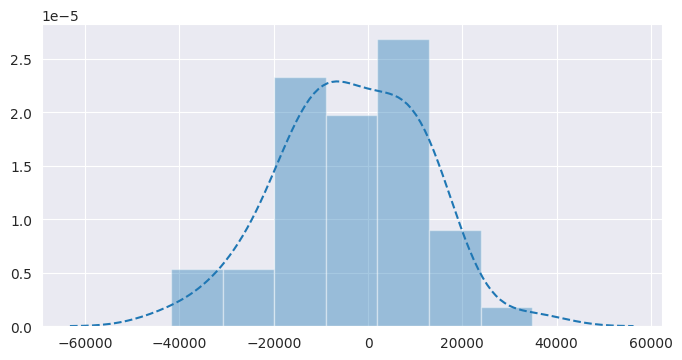

In [926]:
sns.set_style("darkgrid")
plt.figure(figsize=(8,4),dpi=100)  
sns.distplot(stress_loss,hist=True, kde=True, rug=False,norm_hist = True,
kde_kws={'linestyle':'--'}, 
label='stress loss')

# **设定10bins来绘制histogram**

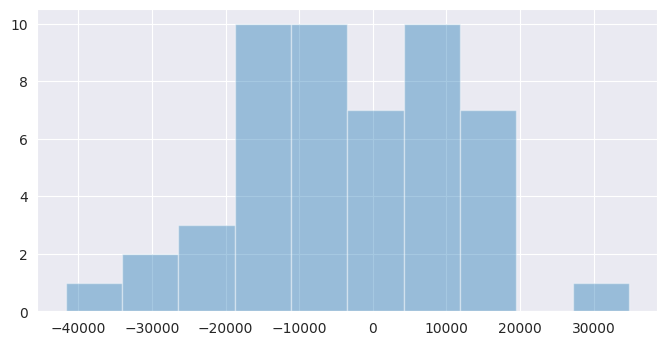

In [927]:
sns.set_style("darkgrid")
plt.figure(figsize=(8,4),dpi=100)  
sns.distplot(stress_loss, bins=10,hist=True, kde=False, rug=False,norm_hist = False,
kde_kws={'linestyle':'--'}, 
label='stress loss')

# **绘制empirical loss distribution**

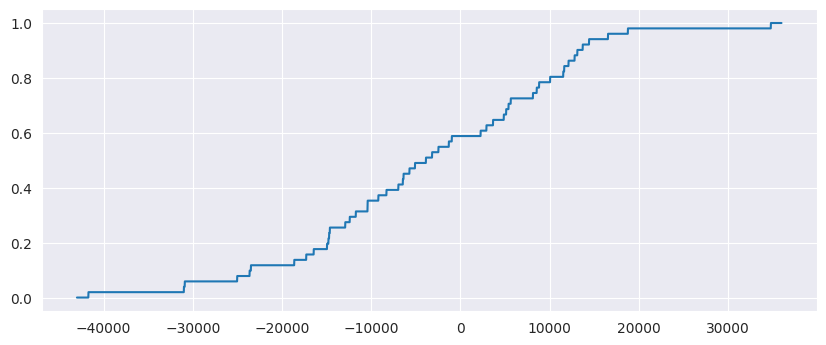

In [928]:
plt.figure(figsize=(10,4),dpi=100) 
length=51
x=np.linspace(-43000,36000,8000)
y=[]
for i in range(8000):
  m=x[i]
  function=[0]*(length+1)
  if m<stress_loss[0]:
    function[0]=0
  if m>=stress_loss[(length-1)]:
    function[length]=1
  for j in range((length-1)):
    if m>=stress_loss[j] and m<stress_loss[j+1]:
      function[j+1]=(1+j)/length
  b=0
  for n in range((length+1)):
    b+=function[n]
  y.append(b)
plt.plot(x,y)

# **因为python实现不了断点，所以在每一段端点python绘图都连上了，实际情况在每一段端点处应断开，每一段都取左端点不取右端点，写report的时候注明。**

In [929]:
0.99*52

51.48

In [930]:
0.95*52

49.4

**SVAR0.99 = 34804.56**

**SVAR0.95 = 16540.53**

# **Now we compute stress test of the current market disaster to compare with the scenarios.**

In [931]:
B30= drd.get_data_yahoo('^TYX','05/06/2019','05/06/2020',interval='d')
tradingdays2=B30.index
tradingdays2
len(tradingdays2)

251

In [932]:
weektime2=[]
for i in tradingdays2:
  if i.weekday() == 2:
    weektime2.append(i)
len(weektime2)
nan_list=[]
nan_index=[]
for i in range(49):
  if weektime2[i+1]-weektime2[i] != pd.Timedelta('7 days'):
    nan_list.append(weektime2[i])
    nan_index.append(i)


#weektime: wednesday date list
#weektime[-1]
print(nan_index)
print(nan_list)

[7, 31]
[Timestamp('2019-06-26 00:00:00'), Timestamp('2019-12-18 00:00:00')]


In [933]:
p1=pd.Timestamp(2019,7,2)
p2=pd.Timestamp(2019,12,23)
p3=pd.Timestamp(2019,12,31)
weektime2.insert(8,p1)
weektime2.insert(33,p2)
weektime2.insert(34,p3)
len(weektime2)

53

In [934]:
weektime2

[Timestamp('2019-05-08 00:00:00'),
 Timestamp('2019-05-15 00:00:00'),
 Timestamp('2019-05-22 00:00:00'),
 Timestamp('2019-05-29 00:00:00'),
 Timestamp('2019-06-05 00:00:00'),
 Timestamp('2019-06-12 00:00:00'),
 Timestamp('2019-06-19 00:00:00'),
 Timestamp('2019-06-26 00:00:00'),
 Timestamp('2019-07-02 00:00:00'),
 Timestamp('2019-07-10 00:00:00'),
 Timestamp('2019-07-17 00:00:00'),
 Timestamp('2019-07-24 00:00:00'),
 Timestamp('2019-07-31 00:00:00'),
 Timestamp('2019-08-07 00:00:00'),
 Timestamp('2019-08-14 00:00:00'),
 Timestamp('2019-08-21 00:00:00'),
 Timestamp('2019-08-28 00:00:00'),
 Timestamp('2019-09-04 00:00:00'),
 Timestamp('2019-09-11 00:00:00'),
 Timestamp('2019-09-18 00:00:00'),
 Timestamp('2019-09-25 00:00:00'),
 Timestamp('2019-10-02 00:00:00'),
 Timestamp('2019-10-09 00:00:00'),
 Timestamp('2019-10-16 00:00:00'),
 Timestamp('2019-10-23 00:00:00'),
 Timestamp('2019-10-30 00:00:00'),
 Timestamp('2019-11-06 00:00:00'),
 Timestamp('2019-11-13 00:00:00'),
 Timestamp('2019-11-

In [0]:
AAPL= drd.get_data_yahoo('AAPL','05/06/2019','05/06/2020',interval='d')
TSLA= drd.get_data_yahoo('TSLA','05/06/2019','05/06/2020',interval='d')
GILD= drd.get_data_yahoo('GILD','05/06/2019','05/06/2020',interval='d')
MELI= drd.get_data_yahoo('MELI','05/06/2019','05/06/2020',interval='d')
MSFT= drd.get_data_yahoo('MSFT','05/06/2019','05/06/2020',interval='d')
DIS= drd.get_data_yahoo('DIS','05/06/2019','05/06/2020',interval='d')
NVDA= drd.get_data_yahoo('NVDA','05/06/2019','05/06/2020',interval='d')
TCO= drd.get_data_yahoo('TCO','05/06/2019','05/06/2020',interval='d')
MMM= drd.get_data_yahoo('MMM','05/06/2019','05/06/2020',interval='d')
INCY= drd.get_data_yahoo('INCY','05/06/2019','05/06/2020',interval='d')
IBM= drd.get_data_yahoo('IBM','05/06/2019','05/06/2020',interval='d')
EPC= drd.get_data_yahoo('EPC','05/06/2019','05/06/2020',interval='d')
SPY= drd.get_data_yahoo('SPY','05/06/2019','05/06/2020',interval='d')
YELP= drd.get_data_yahoo('YELP','05/06/2019','05/06/2020',interval='d')
VTI= drd.get_data_yahoo('VTI','05/06/2019','05/06/2020',interval='d')

In [0]:
stock_list=[AAPL,TSLA,GILD,MELI,MSFT,DIS,NVDA,TCO,MMM,INCY,IBM,EPC,SPY,YELP,VTI]
index_list=['AAPL','TSLA','GILD','MELI','MSFT','DIS','NVDA','TCO','MMM','INCY','IBM','EPC','SPY','YELP','VTI']

from datetime import date
total_num=len(tradingdays2)
date_list2=[]
for i in range(total_num-1):
  if tradingdays2[i].day > tradingdays2[i+1].day:
    date_list2.append(tradingdays2[i])

def new_portfolio():
    res = pd.DataFrame(columns=['Share', 'Adj Close'],index=pd.Series(index_list))
    return res

my_port = new_portfolio()
update_list=[]

for j in range(len(date_list2)):
  b=date_list2[j]
  my_port=new_portfolio()
  for i in range(len(index_list)):
    a=index_list[i]
    my_port.loc[a,'Adj Close']=stock_list[i].loc[b,'Adj Close']
  update_list.append(my_port)

for i in range(len(index_list)):
    a=index_list[i]
    update_list[0].loc[a,'Share']=(400000/15)/update_list[0].loc[a,'Adj Close']

def total_value(portfolio1,portfolio2):
  res=0
  for i in range(len(index_list)):
    a=index_list[i]
    res+=portfolio1.loc[a,'Share']*portfolio2.loc[a,'Adj Close']
  return res

for i in range(len(update_list)-1):
  to_value=total_value(update_list[i],update_list[i+1])
  for j in range(len(index_list)):
    a=index_list[j]
    update_list[i+1].loc[a,'Share']=(to_value/15)/update_list[i+1].loc[a,'Adj Close']

In [0]:
week_stock2=[] #所有Wednesday的portfolio

for j in range(len(weektime2)):
  b=weektime2[j]
  my_port=new_portfolio()
  for i in range(len(index_list)):
    a=index_list[i]
    my_port.loc[a]['Adj Close']=stock_list[i].loc[b]['Adj Close']
  week_stock2.append(my_port)
week_stock2

m=0
for i in range(len(week_stock2)):
  if weektime2[i].month <= date_list2[m].month:
    for j in range(len(index_list)):
      a=index_list[j]
      week_stock2[i].loc[a]['Share']=update_list[m+1].loc[a]['Share']
  else:
    m+=1
    for j in range(len(index_list)):
      a=index_list[j]
      week_stock2[i].loc[a]['Share']=update_list[m+1].loc[a]['Share']

In [938]:
len(week_stock2)

53

In [0]:
for j in range(len(week_stock2)):
  v=0
  for i in range(len(index_list)):
    a=index_list[i]
    v+=week_stock2[j].loc[a,'Adj Close']*week_stock2[j].loc[a,'Share']
  stock_value.append(v)


In [0]:
stock_loss=[]
for i in range(52):
  a=stock_value[i+1]-stock_value[i]
  stock_loss.append(-a)

In [941]:
stock_loss

[26909.739074867044,
 -12112.154403672263,
 3140.3714221300907,
 -15082.182201119955,
 18446.807068374357,
 5776.264999270323,
 -14164.339551328681,
 3895.9510562858777,
 -4655.967937213136,
 -17234.50387136842,
 -6984.513322661107,
 4378.605329992541,
 -6948.778489029908,
 -6885.379041238222,
 -4199.803271856916,
 9494.310443336086,
 -4666.984390139987,
 6222.841121778183,
 -1559.1737050380907,
 20269.95538096543,
 31925.696244513034,
 12868.673080077278,
 -2156.978880024748,
 183.3207466721069,
 20659.66789231263,
 -21176.355889559316,
 -8550.648674973869,
 -12350.640295460063,
 -800.2868333293591,
 -6961.988439881476,
 -1125.851406067086,
 -9379.259067853971,
 -12266.650834345783,
 -2214.3853237766307,
 -1061.8406917097163,
 5336.929371458245,
 16019.994351083296,
 -6559.401756082661,
 -6244.994457445748,
 -12905.327954094508,
 -3902.894025369431,
 -4887.0384089203435,
 9899.906193107949,
 -1712.483755259891,
 -1185.3545238093939,
 -8916.495358468615,
 -14258.27338664612,
 -7365.252

In [942]:
bond30= drd.get_data_yahoo('^TYX','05/06/2019','05/06/2020',interval='d')

for i in range(len(tradingdays2)):
  a=tradingdays2[i]
  b=bond30.loc[a,'Adj Close']
  bond30.loc[a,'Adj Close']=b*0.01

week_bond=[]
for i in range(len(weektime2)):
  a=weektime2[i]
  b=bond30.loc[a,'Adj Close']
  week_bond.append(b)

a=27
maturity_list=[a,]
for i in range(len(weektime2)-1):
  a=a-7/365
  maturity_list.append(a)

bond_price=[]
for i in range(len(weektime2)):
  a=np.exp(-maturity_list[i]*week_bond[i])
  bond_price.append(a)

len(bond_price)

53

In [943]:
a=25+(23+30+31+15)/365
#2019.5.8---2047.8.15
maturity_list2=[a,]
for i in range(len(weektime2)-1):
  a=a-7/365
  maturity_list2.append(a)
bond_price2=[]
for i in range(len(weektime2)):
  a=np.exp(-maturity_list2[i]*week_bond[i])
  bond_price2.append(a)
len(bond_price2)

a=28+(23+30+31+15)/365
#2019.5.8---2047.8.15
maturity_list1=[a,]
for i in range(len(weektime2)-1):
  a=a-7/365
  maturity_list1.append(a)
bond_price1=[]
for i in range(len(weektime2)):
  a=np.exp(-maturity_list1[i]*week_bond[i])
  bond_price1.append(a)
len(bond_price1)

53

In [0]:
bond10=bond_price1[:20]+[0.57639,0.59218,0.59413,0.57203,0.56817,0.56815,0.55983,0.55275,0.57484,0.57900,0.57290,0.57439,0.55673,0.55915,0.55142,0.55145,0.57239,0.572375,0.598495,0.584175,0.592505,0.604465,0.63292,0.64429,0.68259,0.62449,0.694705,0.73483,0.71203,0.732635,0.73774,0.72552,0.70000]

In [0]:
bond30=bond_price2[:20]+[0.53646,0.55261,0.55369,0.53157,0.52788,0.52883,0.52192,0.51420,0.53706,0.54177,0.53544,0.53640,0.51922,0.52123,0.51292,0.51662,0.536425,0.537195,0.564690,0.548540,0.556420,0.569590,0.598885,0.613025,0.654810,0.586930,0.657060,0.702030,0.676945,0.698375,0.70697,0.69806,0.66928]

In [946]:
bondshare10=300000/bond10[0]
bondshare30=300000/bond30[0]
bond_loss=[]
for i in range(len(weektime2)-1):
  a=bondshare10*(bond10[i+1]-bond10[i])+bondshare30*(bond30[i+1]-bond30[i])
  bond_loss.append(-a)
bond_loss

[-11026.635878759764,
 -1148.6382448804209,
 -24524.743751962007,
 -7166.369098428921,
 -2046.2829508732066,
 -14785.886462257844,
 4066.613668296838,
 -10547.159613932823,
 10949.241042780623,
 25.34615153542901,
 547.6658419761324,
 -9266.532764635933,
 -61198.50305958977,
 -34209.24078563218,
 5328.168042835805,
 -23655.53224425482,
 3412.5879495329473,
 49706.00853700149,
 5042.815480556648,
 -4827.358482719104,
 -20775.152038543543,
 -1996.3243100680943,
 28776.07613723391,
 4918.034688790082,
 -577.8699015954134,
 9950.824165039783,
 9613.221741662925,
 -29229.994168172863,
 -5756.747046962482,
 8082.473855787452,
 -1609.3008365583028,
 22686.031960487715,
 -2894.4251270501813,
 10421.85604036157,
 -2323.9056597730137,
 -26547.2340285901,
 -469.2006416988317,
 -34851.7851948148,
 19777.104632728784,
 -10561.513934257706,
 -16319.515803404323,
 -37557.75878892794,
 -16522.83928453458,
 -52017.955617404165,
 81707.20718575461,
 -91333.41122310594,
 -55239.937927003906,
 31097.27957

In [0]:
libor2019=[0.02363,0.02349,0.02355,0.02356,0.02345,0.02350,0.02341,0.02354,0.02356,0.02355,0.02363,0.02352,0.02352,0.02099,0.02092,0.02093,0.02087,0.02091,0.02095,0.02185,0.01841,0.01851,0.01790,0.01823,0.01814,0.01804,0.01537,0.01539,0.01529,0.01540,0.01529,0.01525,0.01534,0.01533,0.01543,0.01533,0.01528,0.01533,0.01530,0.01575,0.01574,0.01577,0.01571,0.01088,0.01084,0.00380,0.00201,0.00109,0.00072,0.00066,0.00064,0.00055,0.00060]

In [948]:
len(libor2019)

53

In [0]:
def vol_finder(sigma,weektime):
  len(sigma)
  tradingdays3=sigma.index
  vol=[]
  for i in range(len(weektime)):
    a=list(tradingdays3).index(weektime[i])
    b=np.log(np.array(sigma[:a]['Adj Close'])).std()
    vol.append(b)
  return vol
  
def option_finder(stock,libor,vol,k,maturity,weektime,otype):
  option=[]
  for i in range(len(weektime)):
    a=weektime[i]
    d1 = (np.log(stock.loc[a,'Adj Close'] / k) + (libor[i] + 0.5 * vol[i] ** 2) * maturity[i]) / (vol[i] * np.sqrt(maturity[i]))
    d2 = d1 - vol[i] * np.sqrt(maturity[i])
    price=(otype * stock.loc[a,'Adj Close'] * ss.norm.cdf(otype * d1) - otype * np.exp(-libor[i] * maturity[i]) * k * ss.norm.cdf(otype * d2))
    option.append(price)
  return option

In [950]:
mmm_sigma=drd.get_data_yahoo('MMM','01/03/2018','05/06/2020',interval='d')
mmm_vol=vol_finder(mmm_sigma,weektime2)
spx_sigma=drd.get_data_yahoo('SPY','01/03/2018','05/06/2020',interval='d')
spx_vol=vol_finder(spx_sigma,weektime2)
meli_sigma=drd.get_data_yahoo('MELI','01/03/2018','05/06/2020',interval='d')
meli_vol=vol_finder(meli_sigma,weektime2)
len(meli_vol)

53

In [951]:
for i in range(len(tradingdays2)):
  a=tradingdays2[i]
  b=SPY.loc[a,'Adj Close']
  SPY.loc[a,'Adj Close']=b*10
SPY

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2019-05-06,293.309998,288.899994,289.250000,292.820007,107198100.0,2869.566956
2019-05-07,290.809998,285.809998,290.149994,287.929993,144729900.0,2821.646118
2019-05-08,289.429993,286.869995,287.529999,287.529999,91568300.0,2817.725830
2019-05-09,287.329987,283.299988,285.230011,286.660004,103471100.0,2809.200439
2019-05-10,288.940002,282.299988,285.619995,288.100006,112429300.0,2823.312073
...,...,...,...,...,...,...
2020-04-30,293.320007,288.589996,291.709991,290.480011,122901700.0,2904.800110
2020-05-01,290.660004,281.519989,285.309998,282.790009,125180000.0,2827.900085
2020-05-04,283.899994,279.130005,280.739990,283.570007,80873200.0,2835.700073


In [952]:
a=23+30+31+31+30+31+30+31+31+29+31+30+31+30+17
#2019.5.8---2020.7.17
maturity1=[a/365,]
for i in range(len(weektime2)-1):
  a=a-7
  maturity1.append(a/365)

a=23+30+31+31+30+31+30+31+31+29+31+30+14
#2019.5.8---2020.5.14
maturity2=[a/365,]
for i in range(len(weektime2)-1):
  a=a-7
  maturity2.append(a/365)

a=23+30+31+31+30+31+30+31+31+29+31+30+31+19
#2019.5.8---2020.6.19
maturity3=[a/365,]
for i in range(len(weektime2)-1):
  a=a-7
  maturity3.append(a/365)

len(maturity3)

53

In [953]:
len(weektime2)

53

In [0]:
import scipy.stats as ss
mmm_option=option_finder(MMM,libor2019,mmm_vol,160,maturity1,weektime2,1)
spx_option=option_finder(SPY,libor2019,spx_vol,2800,maturity2,weektime2,-1)
meli_option=option_finder(MELI,libor2019,meli_vol,550,maturity3,weektime2,1)

In [955]:
a=weektime2[0]
share_mmm=400000/(15*MMM.loc[a,'Adj Close'])
share_mmm

154.67723936200125

In [0]:
mmm_loss=[]
for i in range(len(mmm_option)-1):
  loss=200*(mmm_option[i+1]-mmm_option[i])
  mmm_loss.append(loss)

In [957]:
a=weektime2[0]
share_spx=400000/(15*SPY.loc[a,'Adj Close'])
share_spx

9.463896871019314

In [0]:
spx_loss=[]
for i in range(len(spx_option)-1):
  loss=100*(spx_option[i+1]-spx_option[i])
  spx_loss.append(-loss)

In [959]:
a=weektime2[0]
share_meli=400000/(15*MELI.loc[a,'Adj Close'])
share_meli

49.74567546191857

In [960]:
meli_loss=[]
for i in range(len(meli_option)-1):
  loss=100*(meli_option[i+1]-meli_option[i])
  meli_loss.append(-loss)
len(meli_loss)

52

In [961]:
stress_loss=np.sum([meli_loss,spx_loss,mmm_loss,bond_loss,stock_loss], axis = 0)
stress_loss
stress_loss.sort()
stress_loss

array([-92517.12078737, -70415.16521585, -69684.95607023, -54072.4462018 ,
       -44366.17103988, -43579.85458324, -43278.87834584, -32893.09532302,
       -28327.05849941, -25520.03832684, -25485.89780696, -24680.31800691,
       -23589.52624037, -19660.5299372 , -15877.86816335, -14345.74713459,
       -13684.74127771, -12028.83998087, -10341.90136628,  -9604.22244896,
        -8448.5116386 ,  -8125.33970516,  -7881.4685094 ,  -7615.23977276,
        -7283.56419822,  -7211.91365634,  -7074.06741992,  -2796.61727935,
        -2777.64885706,   -543.45842067,   -296.50123891,   1588.94506581,
         2758.00491761,   3805.42373414,   4520.74439628,   4577.99432016,
         6464.39428595,   9386.96382116,   9640.84279714,  11871.42436288,
        12092.96168025,  12941.13841493,  13293.3590413 ,  14405.93411707,
        14523.9794941 ,  14981.32878233,  19648.10145163,  27323.14491326,
        46119.45556904,  48773.52828372,  50074.84017381,  59248.12799021])

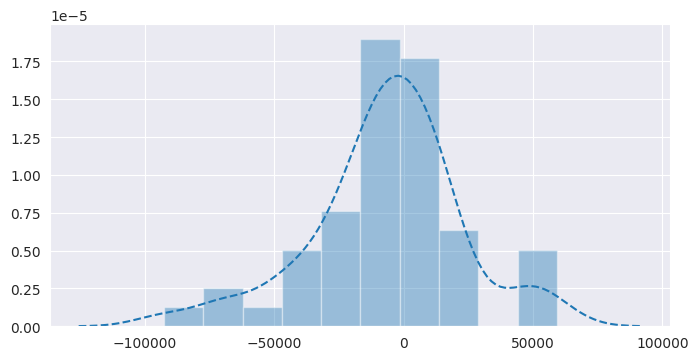

In [962]:
sns.set_style("darkgrid")
plt.figure(figsize=(8,4),dpi=100)  
sns.distplot(stress_loss,hist=True, kde=True, rug=False,norm_hist = True,
kde_kws={'linestyle':'--'}, 
label='stress loss')

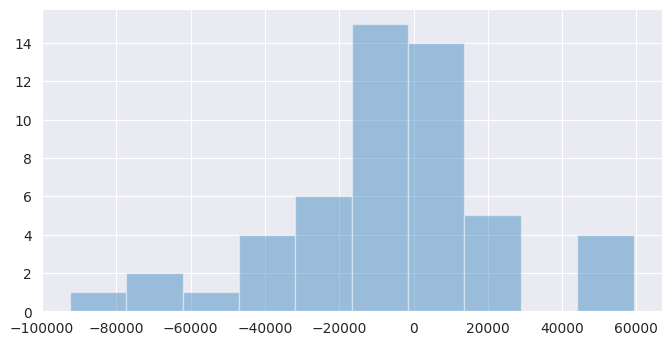

In [963]:
sns.set_style("darkgrid")
plt.figure(figsize=(8,4),dpi=100)  
sns.distplot(stress_loss, bins=10,hist=True, kde=False, rug=False,norm_hist = False,
kde_kws={'linestyle':'--'}, 
label='stress loss')

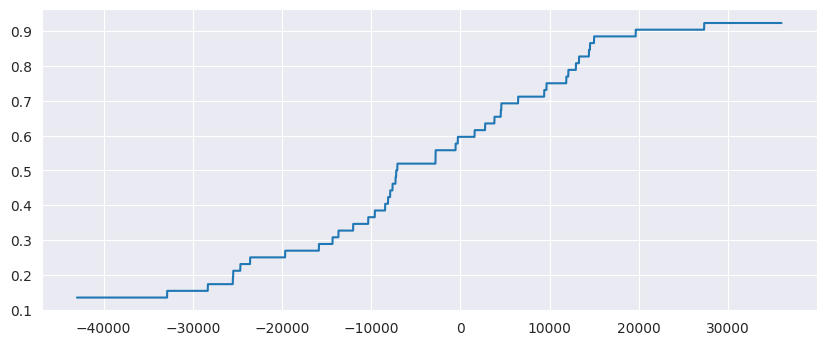

In [964]:

plt.figure(figsize=(10,4),dpi=100) 
length=len(stress_loss)
x=np.linspace(-43000,36000,8000)
y=[]
for i in range(8000):
  m=x[i]
  function=[0]*(length+1)
  if m<stress_loss[0]:
    function[0]=0
  if m>=stress_loss[(length-1)]:
    function[length]=1
  for j in range((length-1)):
    if m>=stress_loss[j] and m<stress_loss[j+1]:
      function[j+1]=(1+j)/length
  b=0
  for n in range((length+1)):
    b+=function[n]
  y.append(b)
plt.plot(x,y)

In [965]:
52*0.99

51.48

In [966]:
52*0.95

49.4

 **SVAR0.99=59248.12**

 **SVAR0.95=48773.52**

# **Compare all three conditions above and give your own conclusion.**

# **Now we work on 3.reduce risk**

In [967]:
m=-45000
if m<stress_loss[0]:
  a=0 
a

Timestamp('2019-05-08 00:00:00')

In [0]:
spx_delta1=delta_finder(spx,spx_maturity1,2885,libor_list2,spx_sigma1)
meli_delta1=[i+1 for i in delta_finder(meli,meli_maturity1,640,libor_list2,meli_sigma1)]
mmm_delta1=[i+1 for i in delta_finder(mmm,mmm_maturity1,130,libor_list2,mmm_sigma1)]

In [0]:
meli_delta1=[i+1 for i in delta_finder(meli,meli_maturity1,640,libor_list2,meli_sigma1)]

In [970]:
meli=[MELI.loc[a,'Adj Close'] for a in weektime2]
meli_delta=[i+1 for i in delta_finder(meli,maturity,45,libor2008,vol)]
meli_delta

IndexError: ignored

In [0]:
meli_loss=[]
for i in range(len(meli)-1):
  a=500*meli_delta[i]*(meli[i+1]-meli[i])
  meli_loss.append(a)
meli_loss